In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')

nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START' - Nino3.4
nasa_mean = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S'].mean().reset_index()
nasa_mean.rename(columns={'LDC_SST_NASA_GEOSS2S': 'MEAN_SST_NASA_GEOSS2S'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3.4
nasa_var = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S'].var().reset_index()
nasa_var.rename(columns={'LDC_SST_NASA_GEOSS2S': 'VAR_SST_NASA_GEOSS2S'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino1+2
nasa_mean_onetwo = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S_ONETWO'].mean().reset_index()
nasa_mean_onetwo.rename(columns={'LDC_SST_NASA_GEOSS2S_ONETWO': 'MEAN_SST_NASA_GEOSS2S_ONETWO'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino1+2
nasa_var_onetwo = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S_ONETWO'].var().reset_index()
nasa_var_onetwo.rename(columns={'LDC_SST_NASA_GEOSS2S_ONETWO': 'VAR_SST_NASA_GEOSS2S_ONETWO'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino3
nasa_mean_three = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S_THREE'].mean().reset_index()
nasa_mean_three.rename(columns={'LDC_SST_NASA_GEOSS2S_THREE': 'MEAN_SST_NASA_GEOSS2S_THREE'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino3
nasa_var_three = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S_THREE'].var().reset_index()
nasa_var_three.rename(columns={'LDC_SST_NASA_GEOSS2S_THREE': 'VAR_SST_NASA_GEOSS2S_THREE'}, inplace=True)

# Calculate the mean grouped by 'L' and 'START' - Nino4
nasa_mean_four = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S_FOUR'].mean().reset_index()
nasa_mean_four.rename(columns={'LDC_SST_NASA_GEOSS2S_FOUR': 'MEAN_SST_NASA_GEOSS2S_FOUR'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START' - Nino4
nasa_var_four = nasa.groupby(['L', 'START'])['LDC_SST_NASA_GEOSS2S_FOUR'].var().reset_index()
nasa_var_four.rename(columns={'LDC_SST_NASA_GEOSS2S_FOUR': 'VAR_SST_NASA_GEOSS2S_FOUR'}, inplace=True)

# Merge the mean and variance DataFrames
dfs = [nasa_mean, nasa_var,nasa_mean_onetwo, nasa_var_onetwo, nasa_mean_three, nasa_var_three, nasa_mean_four, nasa_var_four]
nasa_stat = reduce(lambda left, right: pd.merge(left, right, on=['L', 'START']), dfs)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa_stat['TARGET'] = ((nasa_stat['START'] + nasa_stat['L']).astype(int))%12
nasa_stat['TARGET'] = nasa_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa_stat['SZN'] = nasa_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_NASA_GEOSS2S','VAR_SST_NASA_GEOSS2S',
             'MEAN_SST_NASA_GEOSS2S_ONETWO','VAR_SST_NASA_GEOSS2S_ONETWO',
             'MEAN_SST_NASA_GEOSS2S_THREE','VAR_SST_NASA_GEOSS2S_THREE',
             'MEAN_SST_NASA_GEOSS2S_FOUR','VAR_SST_NASA_GEOSS2S_FOUR' ]
nasa_stat = nasa_stat[new_order]

nasa_stat.to_csv('../Resources/nasa_stat.csv', index=False)

lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nasa_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa
    
nasa_stat_dfs['lead4']

L  START  TARGET  SZN  MEAN_SST_NASA_GEOSS2S  VAR_SST_NASA_GEOSS2S  \
0   4.5     10       2  JFM              25.751421              2.489576   
1   4.5     11       3  FMA              26.037054              2.088243   
2   4.5     12       4  MAM              26.622975              1.534610   
3   4.5      1       5  AMJ              27.357952              0.835226   
4   4.5      2       6  MJJ              27.662417              0.546622   
5   4.5      3       7  JJA              27.665527              0.905310   
6   4.5      4       8  JAS              27.419535              1.187658   
7   4.5      5       9  ASO              27.142616              1.523294   
8   4.5      6      10  SON              27.011617              2.036842   
9   4.5      7      11  OND              26.885042              2.443883   
10  4.5      8      12  NDJ              26.401281              2.612151   
11  4.5      9       1  DJF              25.964420              2.382471   

    MEAN_SST_NASA_GEOSS2S_ONETWO  VAR_SST_NASA_GEOSS2S_ONETWO  \
0                      23.775093                     0.682387   
1                      24.470720                     0.750138   
2                      23.986552                     0.829146   
3                      22.976021                     0.825825   
4                      22.084292                     1.091616   
5                      21.678694                     1.539674   
6                      21.213716                     1.963195   
7                      20.387371                     1.860170   
8                      20.519070                     1.868498   
9                      20.970057                     1.551212   
10                     21.780253                     1.354563   
11                     22.827921                     0.844464   

    MEAN_SST_NASA_GEOSS2S_THREE  VAR_SST_NASA_GEOSS2S_THREE  \
0                     24.943128                    2.180613   
1                     25.432003                    1.896332   
2                     25.829185                    1.475640   
3                     26.248340                    0.915961   
4                     26.241321                    0.813612   
5                     26.041514                    1.276652   
6                     25.687316                    1.631989   
7                     25.211824                    1.944209   
8                     25.112327                    2.394232   
9                     25.071051                    2.590395   
10                    24.879731                    2.625186   
11                    24.825076                    2.188387   

    MEAN_SST_NASA_GEOSS2S_FOUR  VAR_SST_NASA_GEOSS2S_FOUR  
0                    27.841581                   1.508197  
1                    27.884384                   1.310315  
2                    28.207948                   1.047371  
3                    28.801140                   0.638167  
4                    29.158458                   0.434579  
5                    29.369929                   0.536595  
6                    29.316621                   0.587878  
7                    29.198787                   0.798038  
8                    29.093406                   1.108273  
9                    29.002601                   1.349152  
10                   28.593921                   1.433909  
11                   28.175620                   1.504736

In [33]:
obs = pd.read_csv('../Resources/monthly_obs.csv')

#import gfdl data
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}
# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1; 
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl

#import cola data
cola_stat = pd.read_csv('../Resources/cola_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
cola_stat_dfs = {}
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola


#import canada data
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
canada_stat_dfs = {}
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        rest_of_df = filtered_canada.iloc[:-1]
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    canada_stat_dfs[f'lead{lead}'] = filtered_canada

#import ncep data
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
ncep_stat_dfs = {}
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        rest_of_df = filtered_ncep.iloc[:-1]
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep

ncep_stat_dfs['lead4']

L  START  TARGET  SZN  MEAN_SST_NCEP_CFSv2  VAR_SST_NCEP_CFSv2  \
0   4.5     10       2  JFM            27.274362            0.996944   
1   4.5     11       3  FMA            27.425445            0.697347   
2   4.5     12       4  MAM            27.756773            0.480283   
3   4.5      1       5  AMJ            28.105807            0.272420   
4   4.5      2       6  MJJ            27.962092            0.261228   
5   4.5      3       7  JJA            27.598643            0.515388   
6   4.5      4       8  JAS            26.854828            0.700295   
7   4.5      5       9  ASO            25.866443            1.060720   
8   4.5      6      10  SON            25.402304            1.473076   
9   4.5      7      11  OND            25.815024            1.954842   
10  4.5      8      12  NDJ            26.280115            1.731548   
11  4.5      9       1  DJF            26.911009            1.470624   

    MEAN_SST_NCEP_CFSv2_ONETWO  VAR_SST_NCEP_CFSv2_ONETWO  \
0                    27.277332                   0.600251   
1                    27.777094                   0.455635   
2                    27.291397                   0.406723   
3                    26.141537                   0.299700   
4                    25.050130                   0.554257   
5                    24.503740                   0.955050   
6                    23.782619                   0.883607   
7                    23.057435                   0.571022   
8                    23.060556                   0.364746   
9                    23.683878                   0.456263   
10                   24.689293                   0.548977   
11                   26.084747                   0.668888   

    MEAN_SST_NCEP_CFSv2_THREE  VAR_SST_NCEP_CFSv2_THREE  \
0                   26.759561                  1.115694   
1                   27.289944                  0.820607   
2                   27.574100                  0.651846   
3                   27.507644                  0.365094   
4                   27.001945                  0.321105   
5                   26.494534                  0.661149   
6                   25.718096                  0.848134   
7                   24.771455                  1.030674   
8                   24.342213                  1.157220   
9                   24.640798                  1.599894   
10                  25.098395                  1.604510   
11                  25.970389                  1.482274   

    MEAN_SST_NCEP_CFSv2_FOUR  VAR_SST_NCEP_CFSv2_FOUR  
0                  28.586504                 0.214782  
1                  28.470471                 0.237391  
2                  28.621655                 0.178971  
3                  28.993021                 0.135853  
4                  29.130307                 0.145173  
5                  28.973141                 0.202964  
6                  28.547155                 0.313280  
7                  27.829560                 0.631121  
8                  27.529989                 0.966128  
9                  27.962129                 1.007295  
10                 28.342657                 0.644144  
11                 28.607057                 0.384430

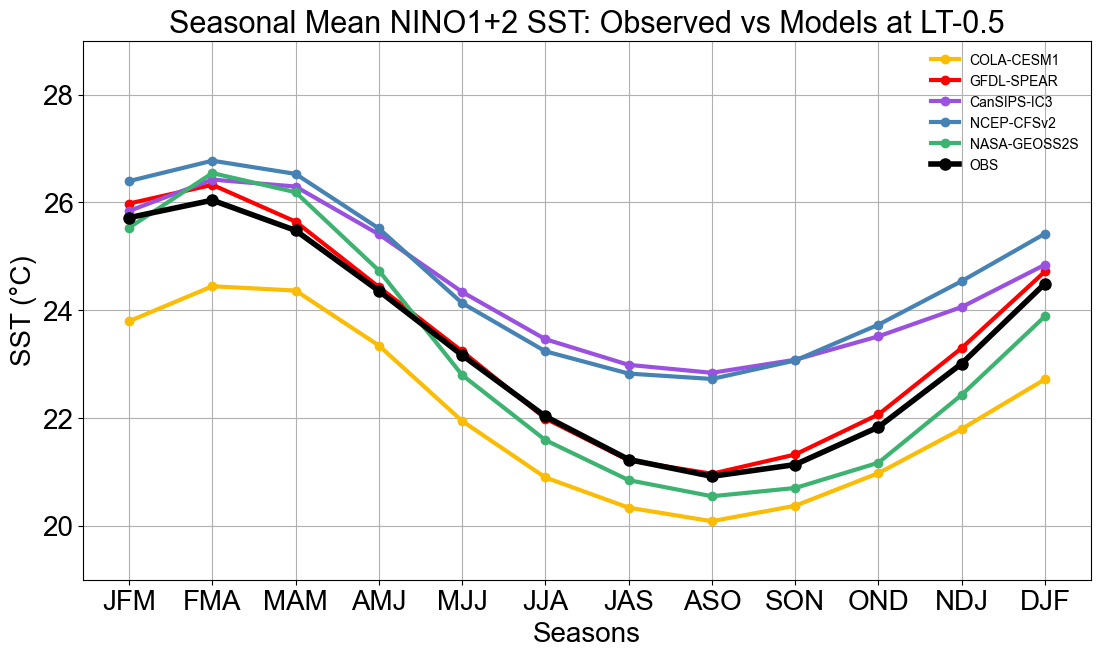

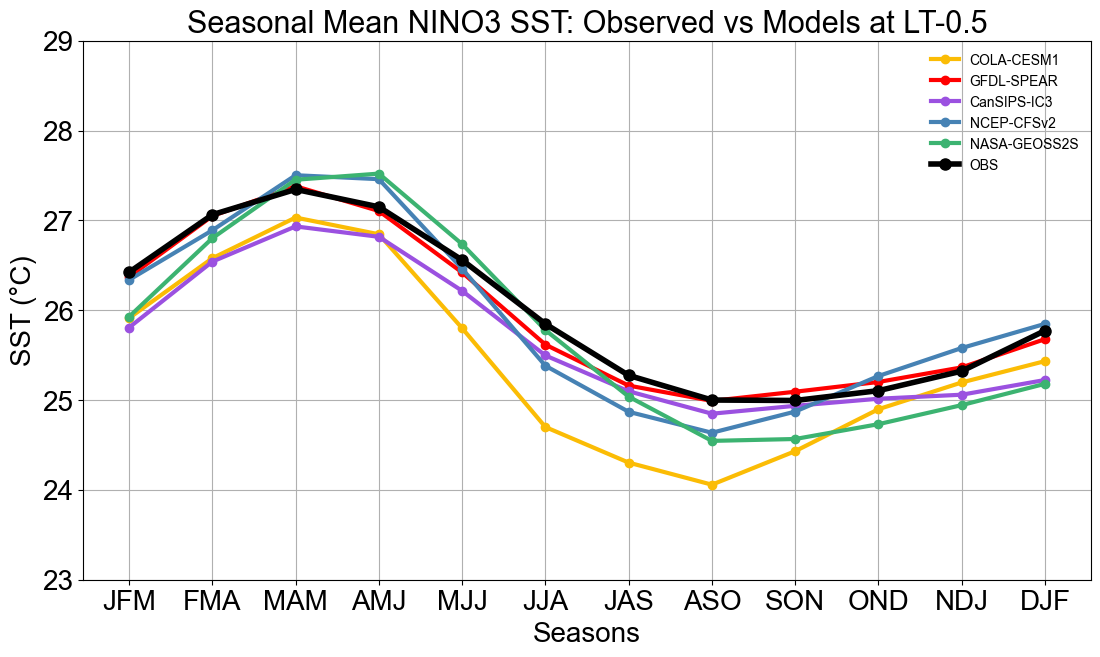

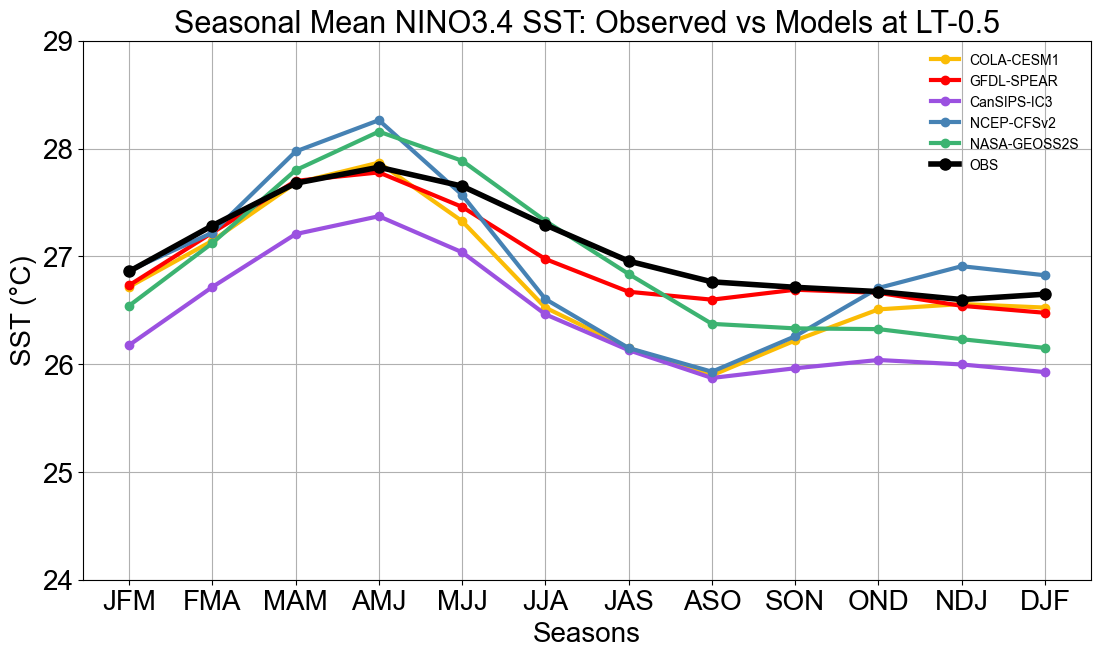

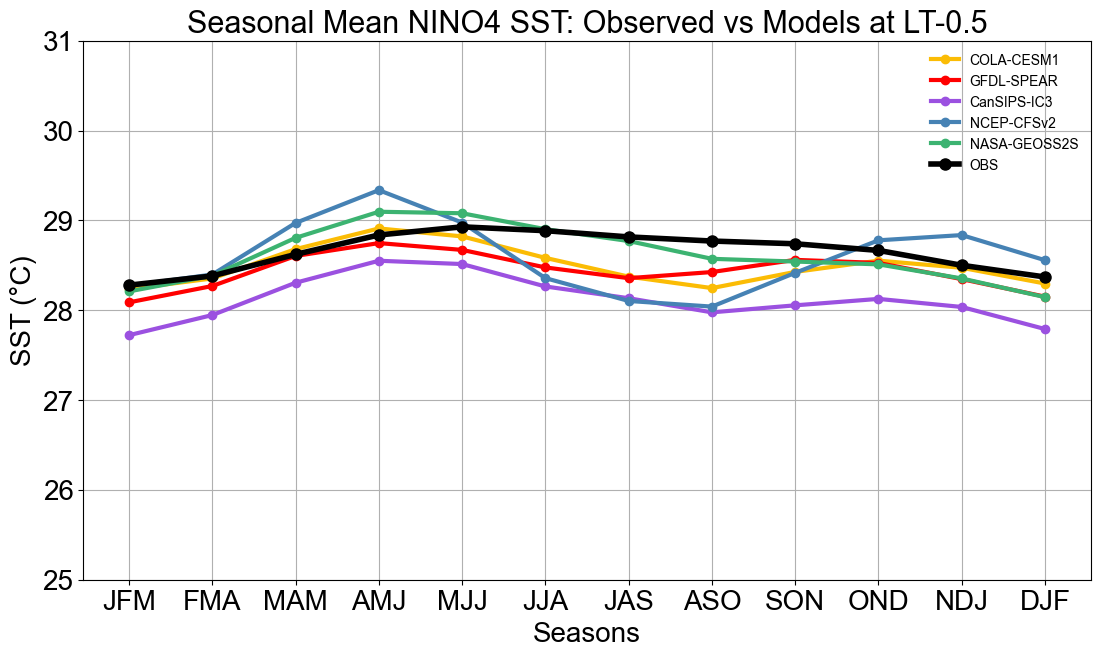

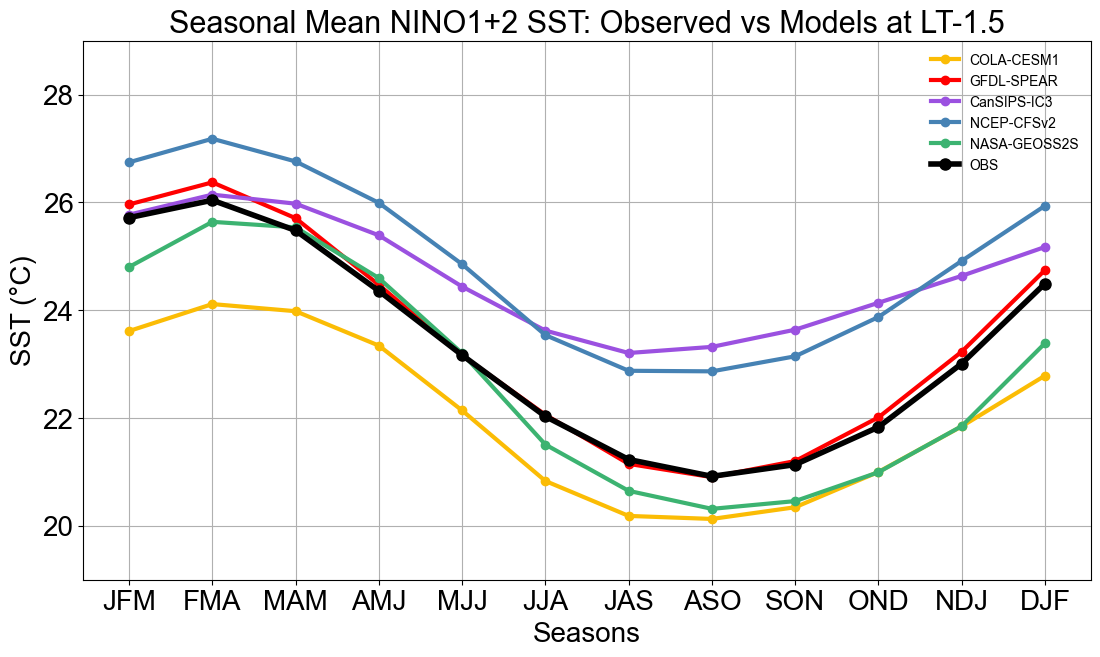

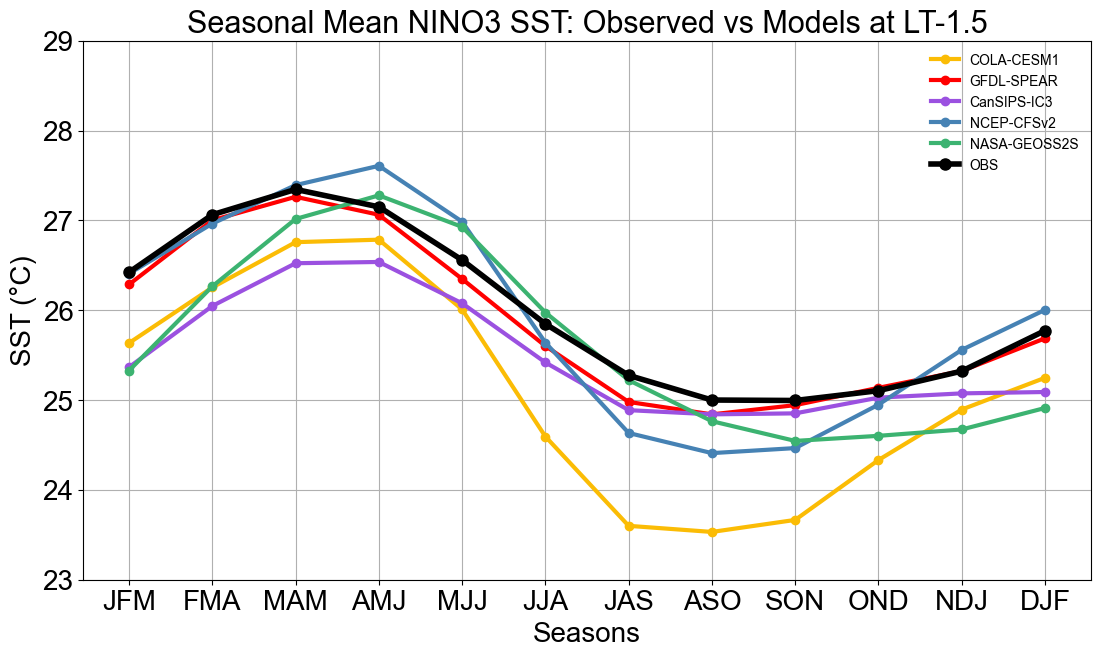

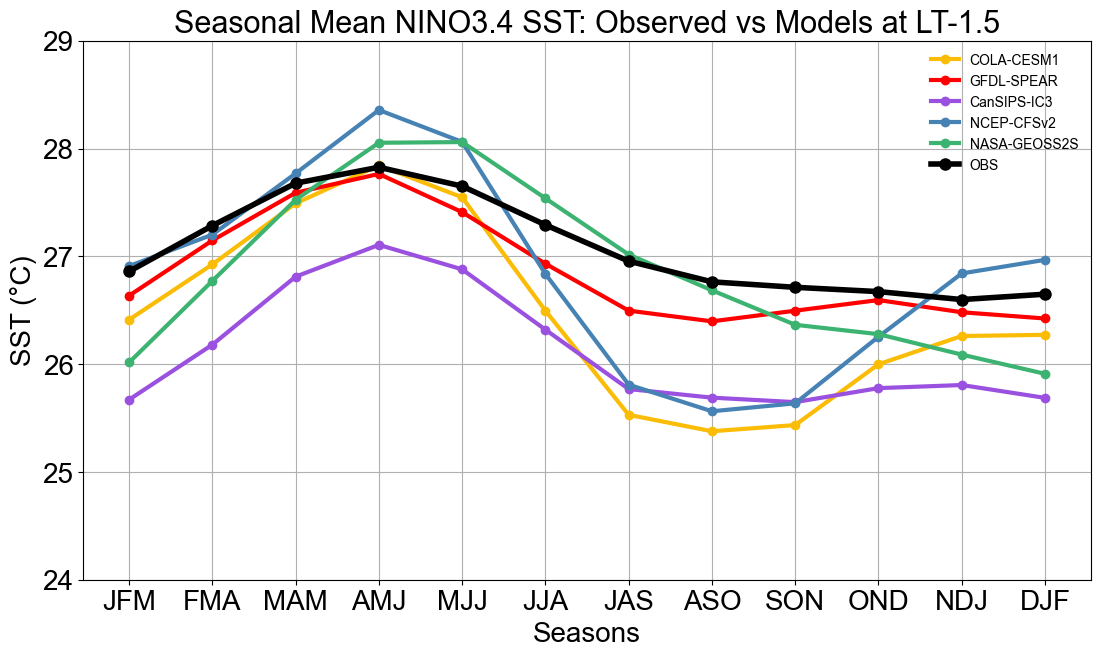

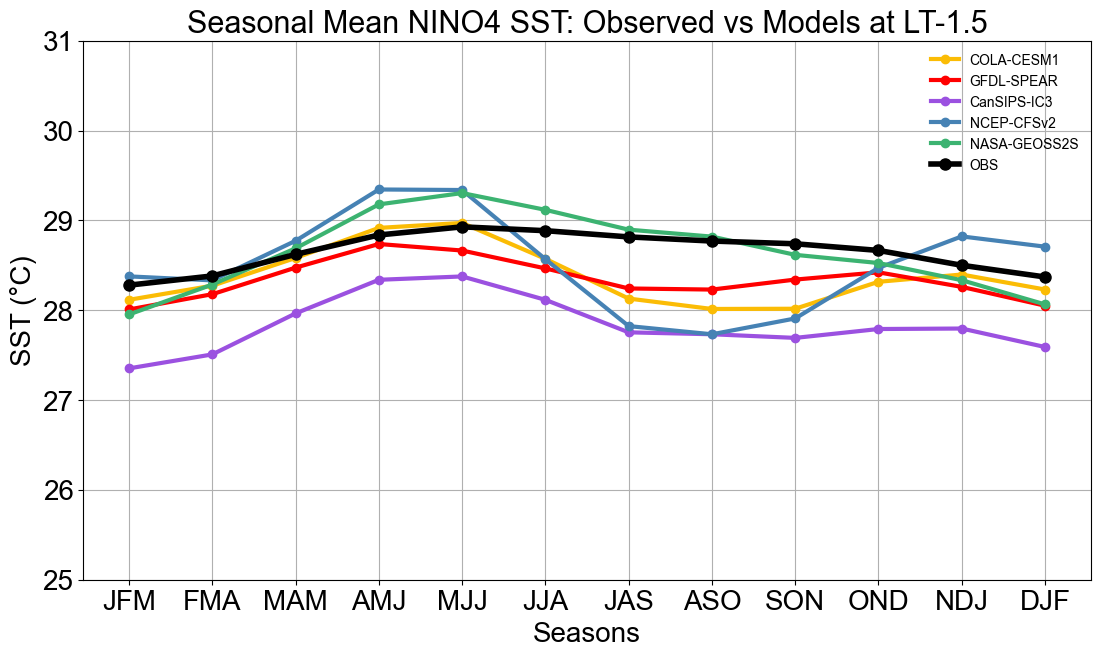

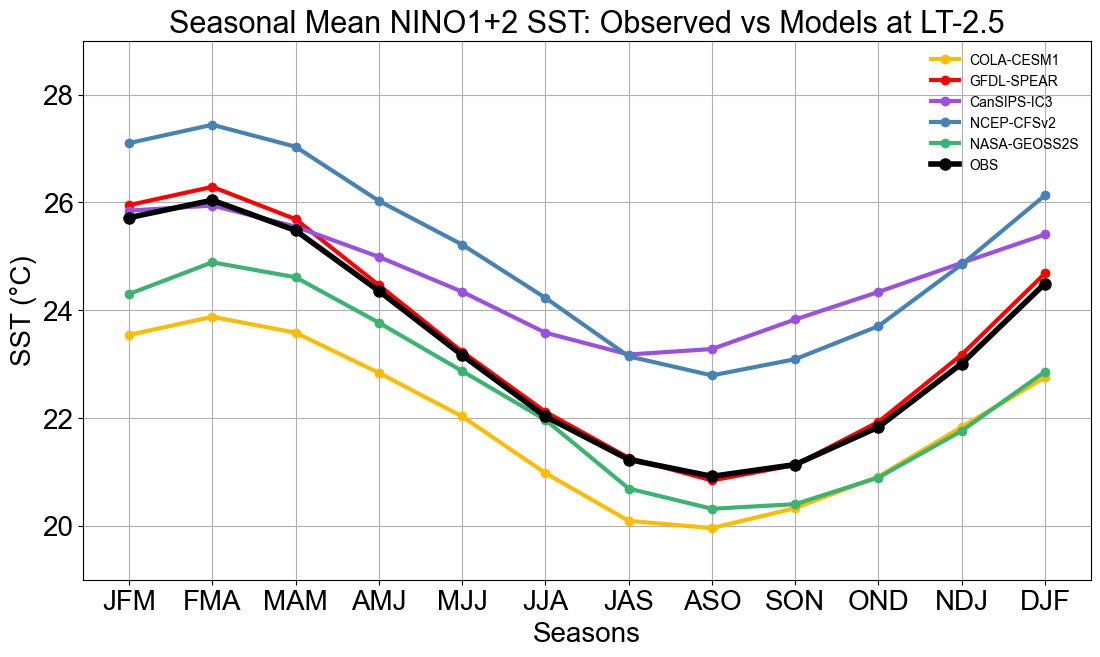

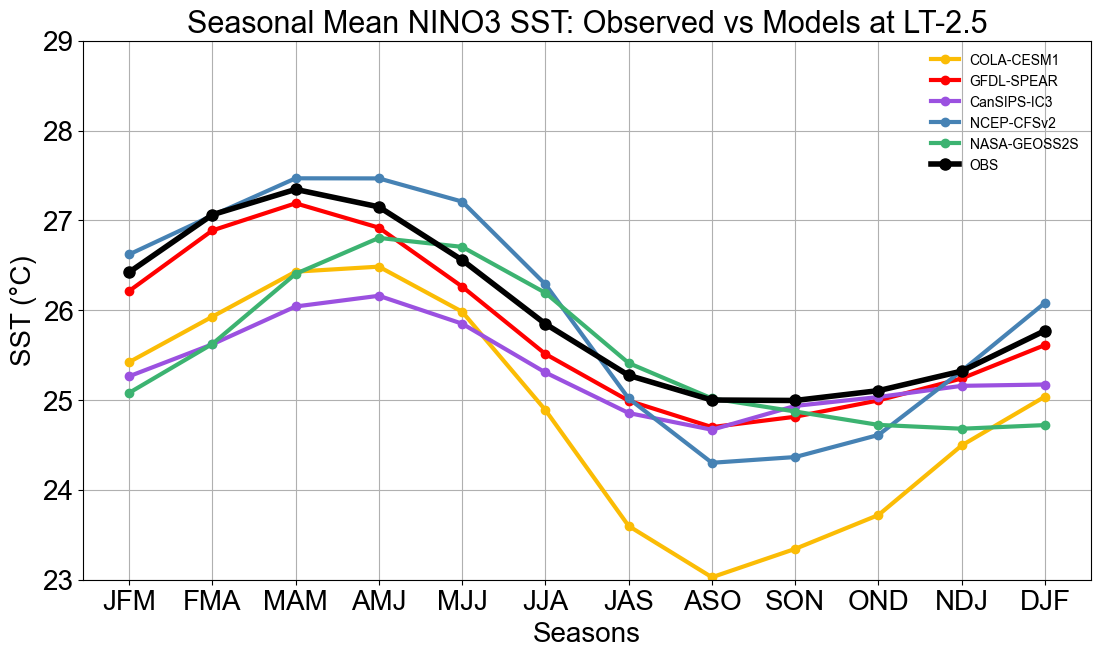

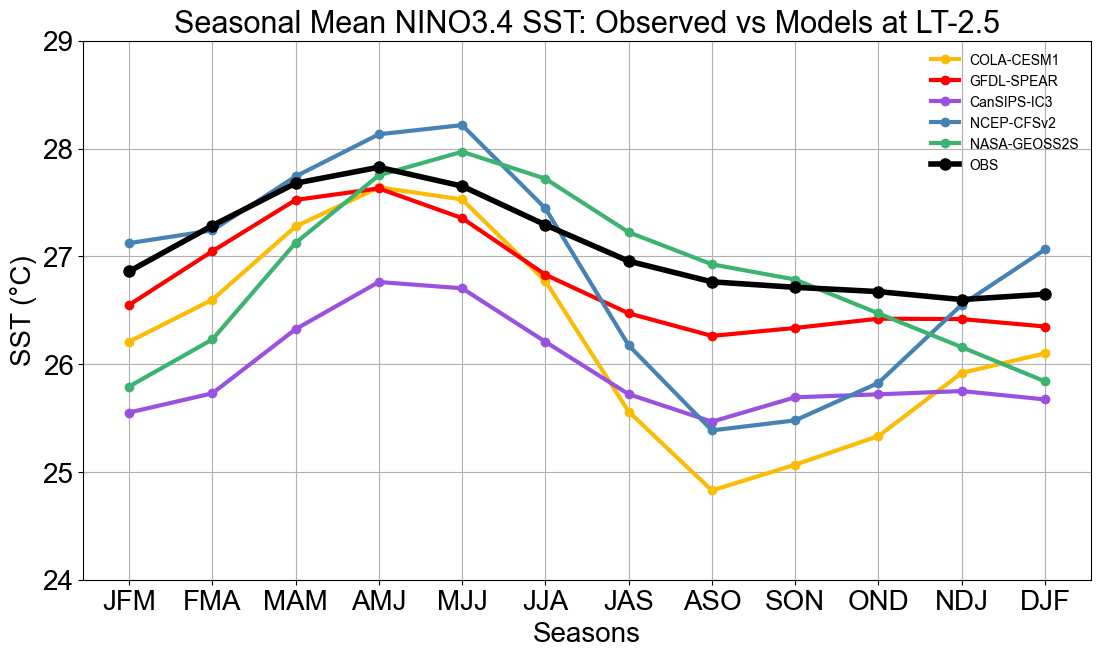

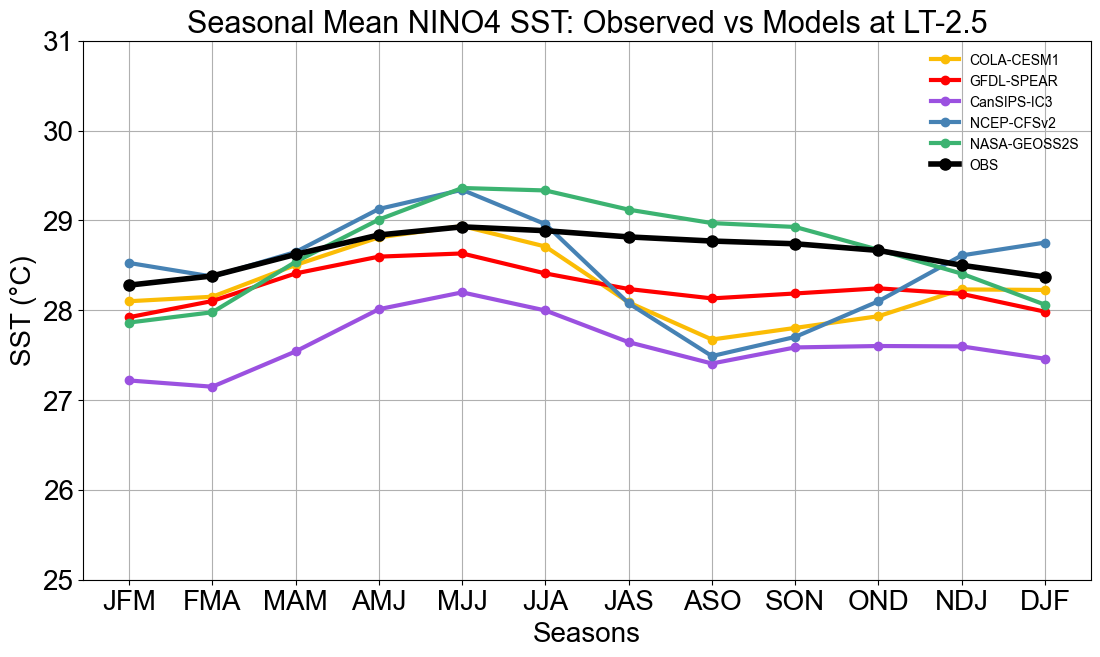

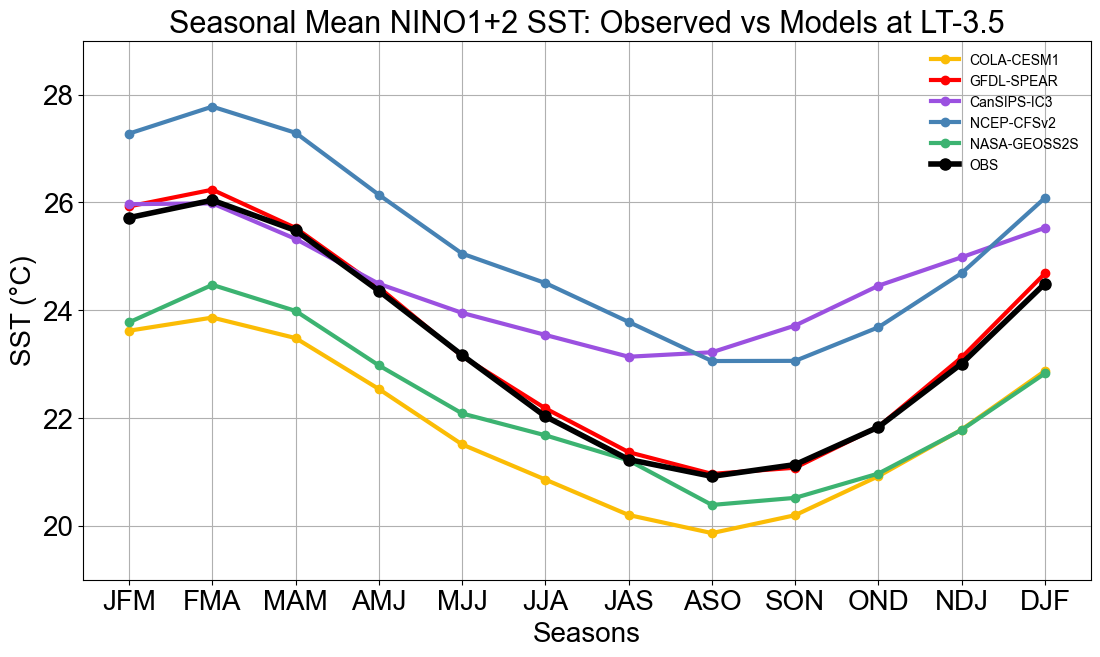

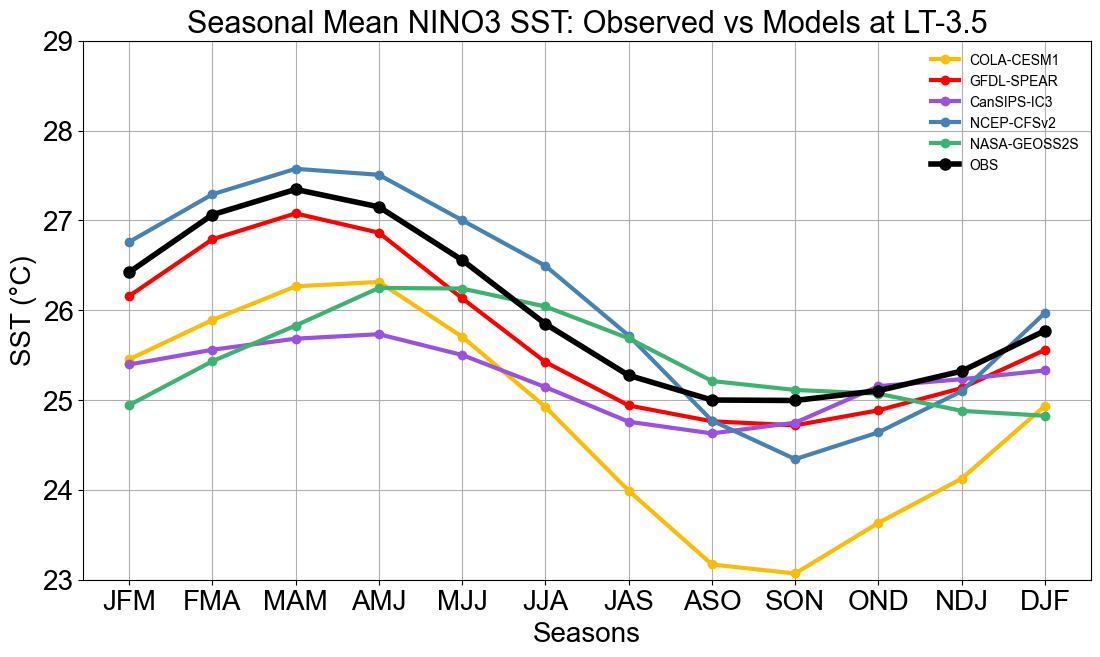

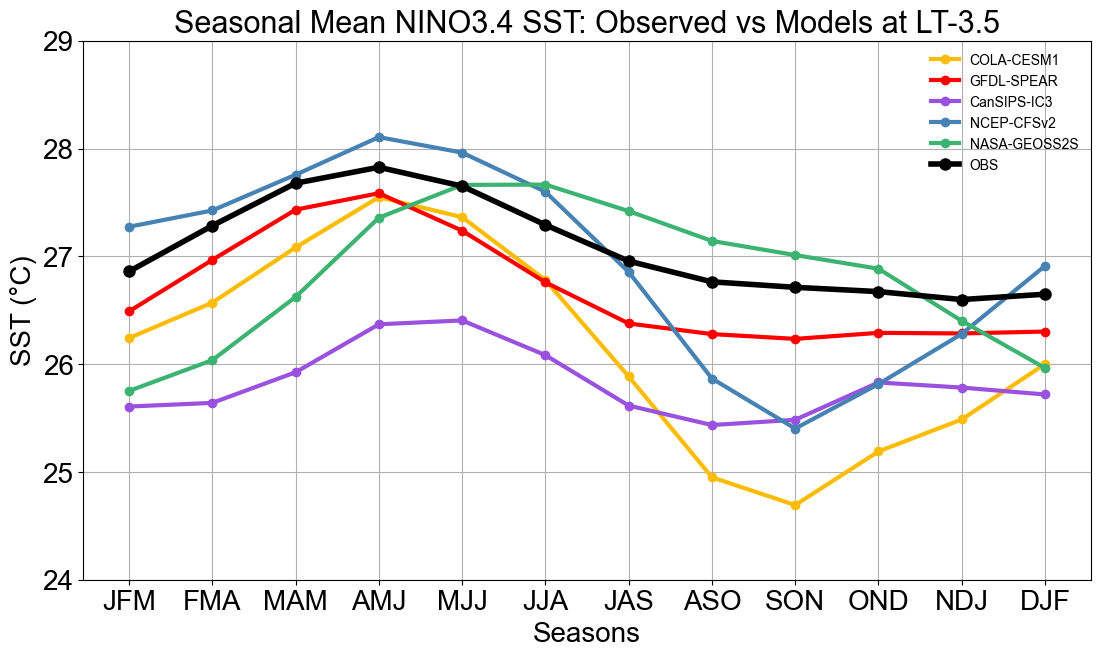

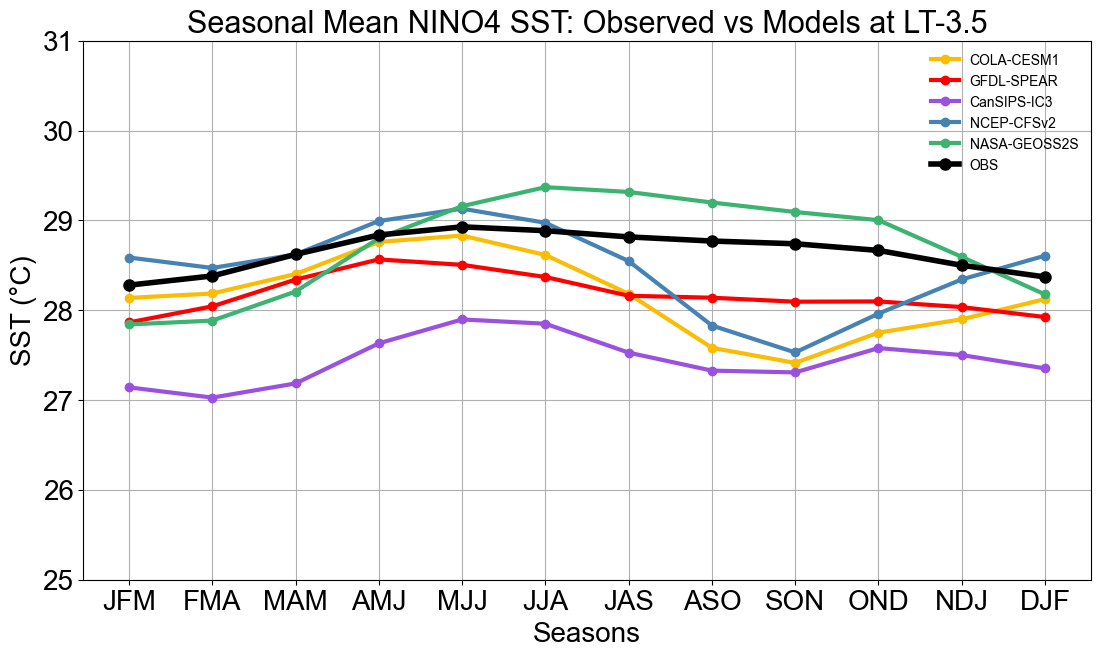

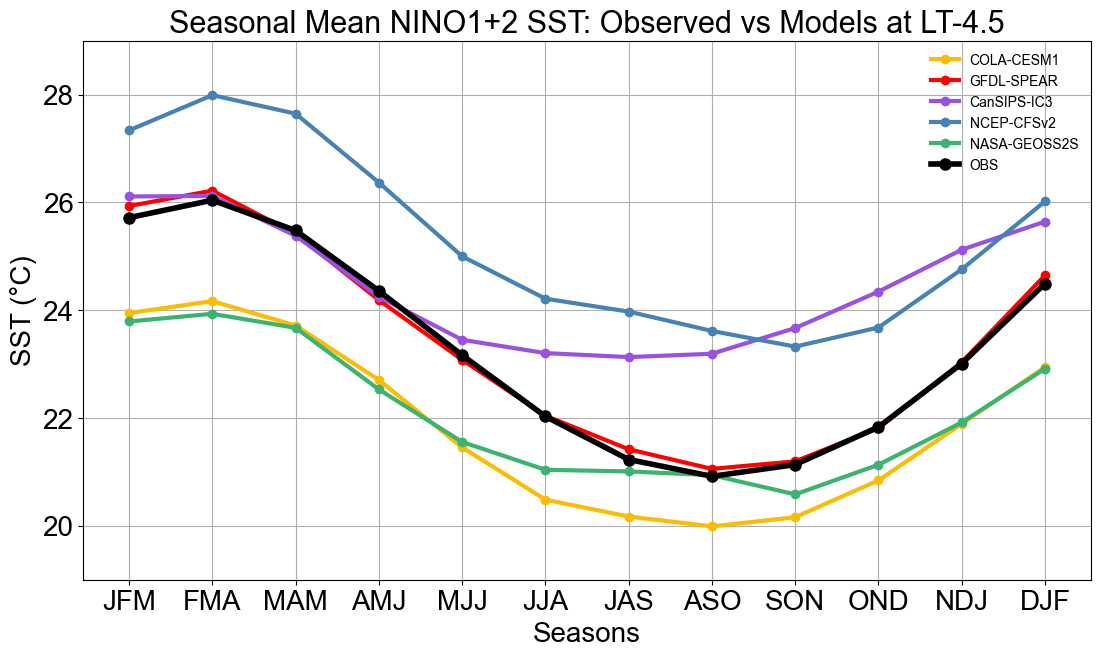

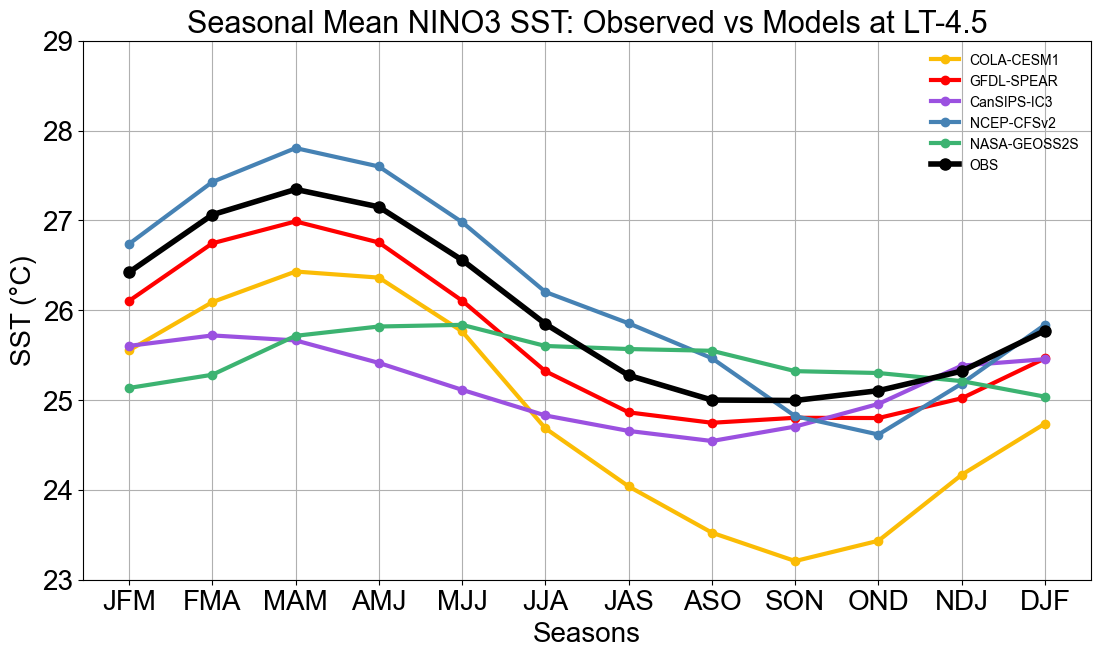

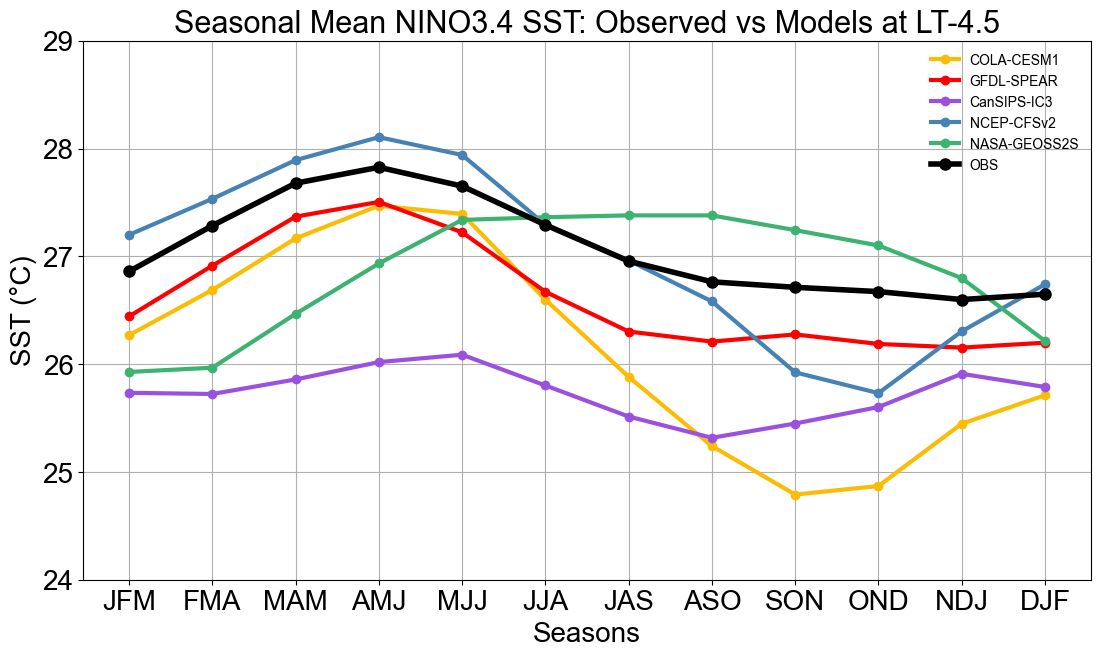

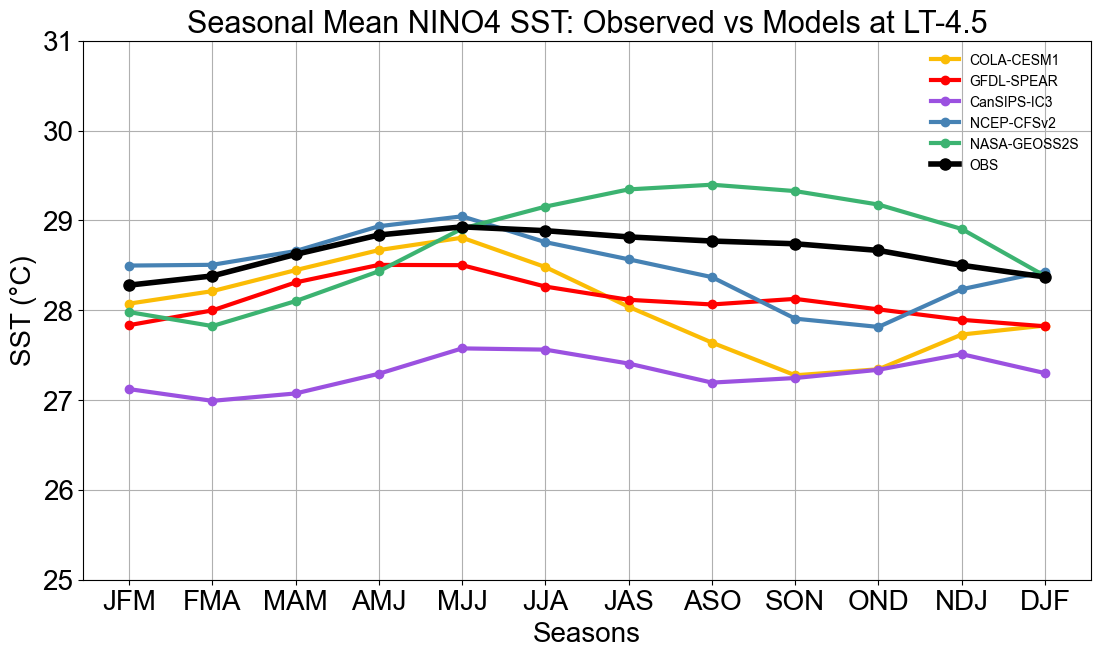

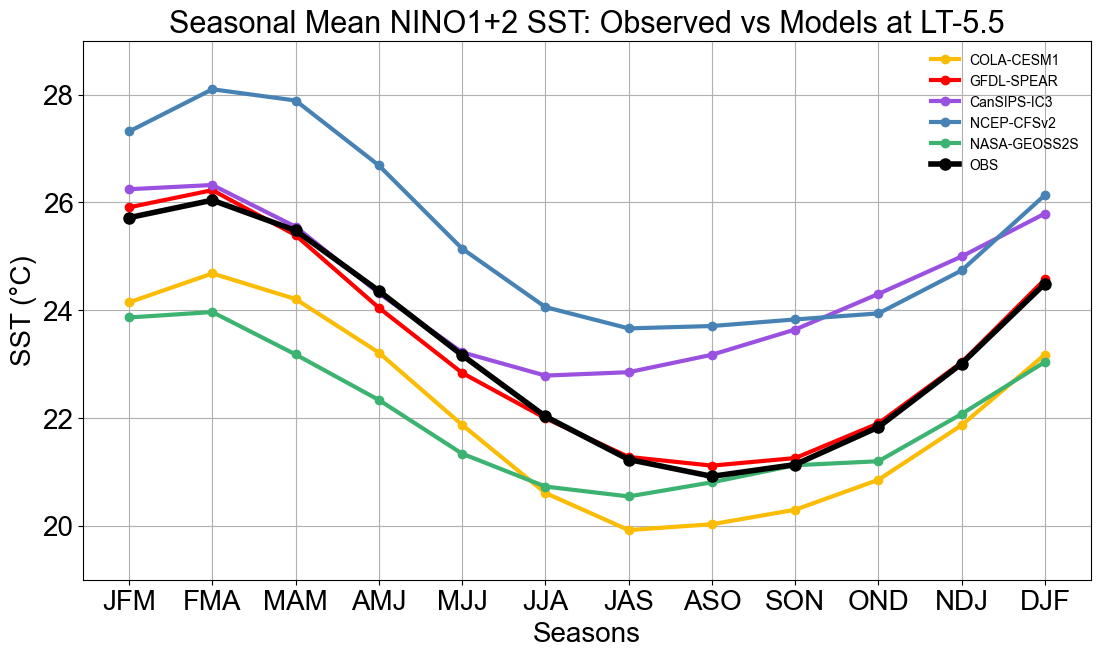

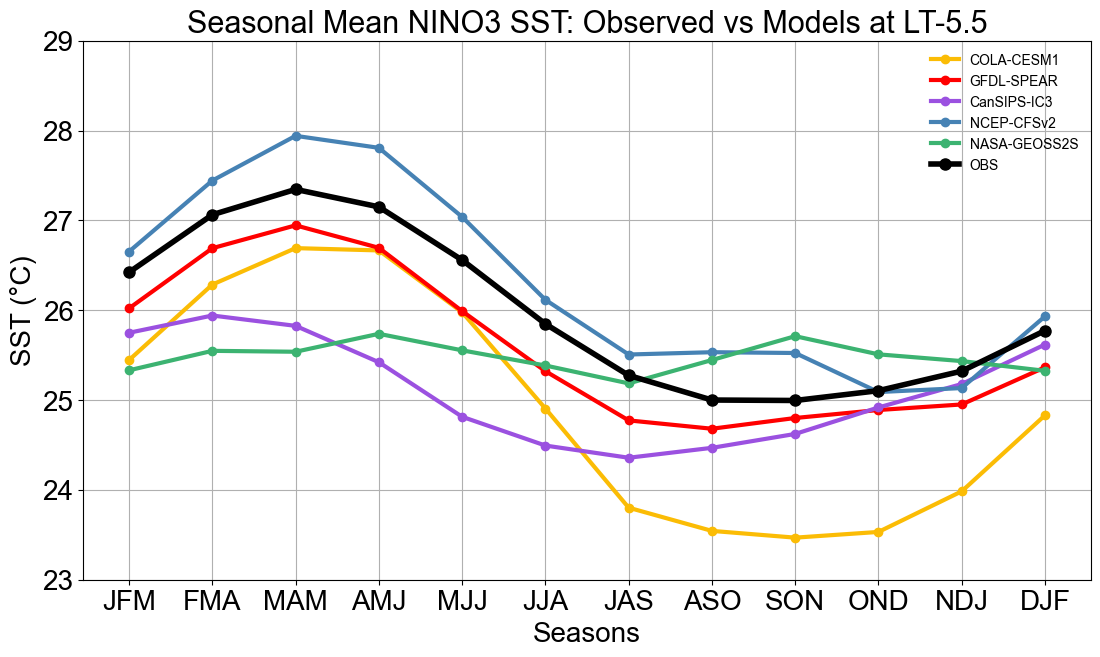

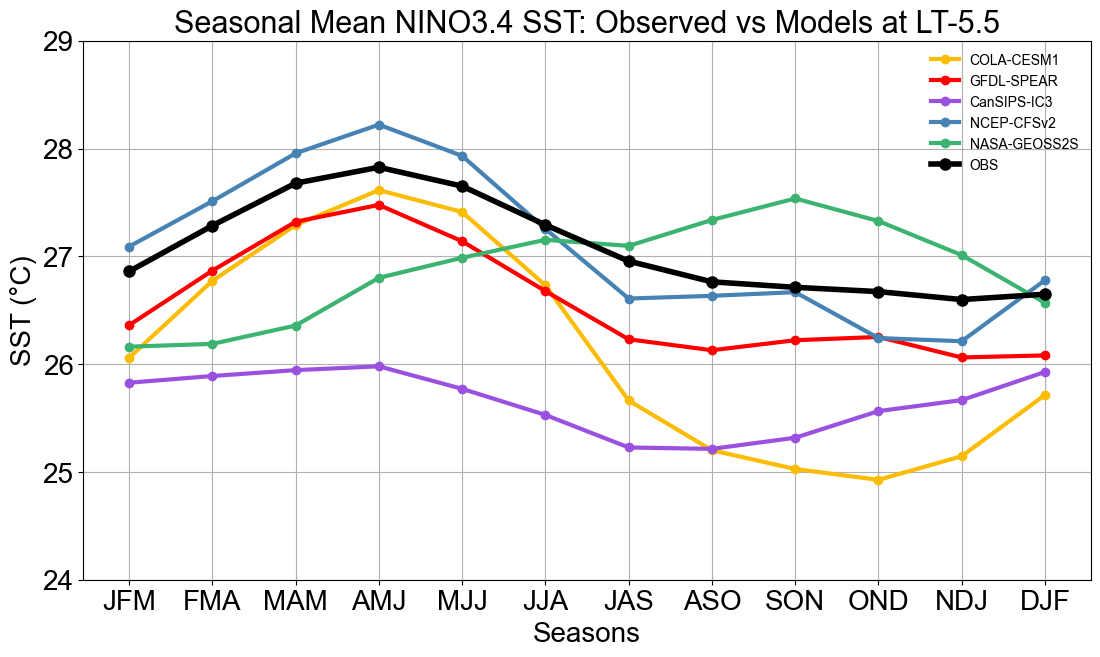

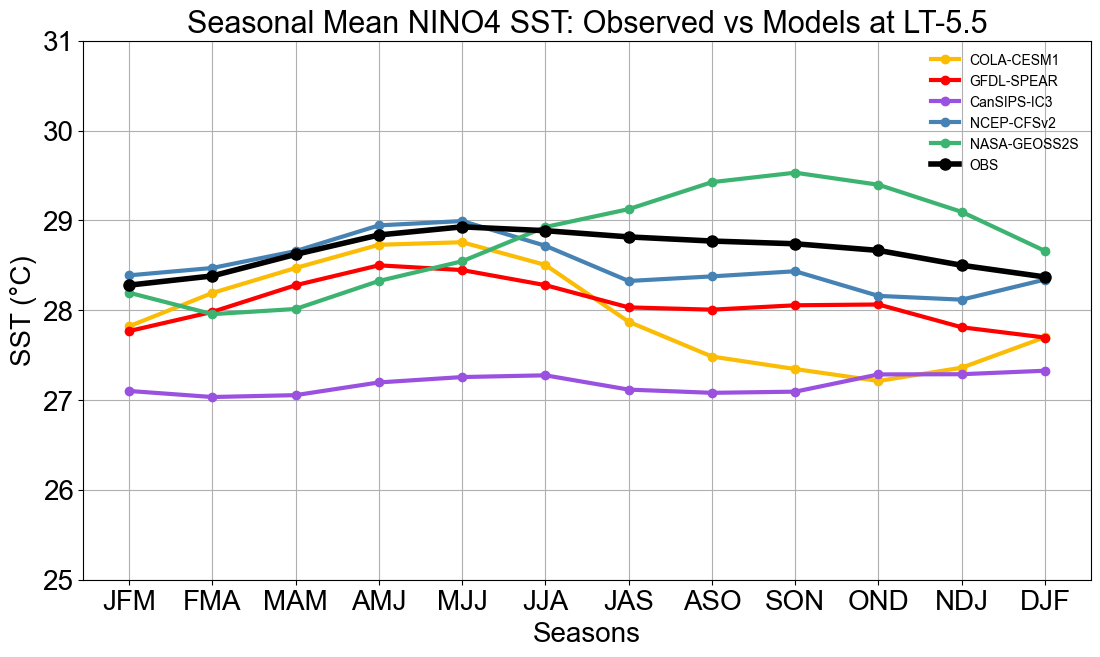

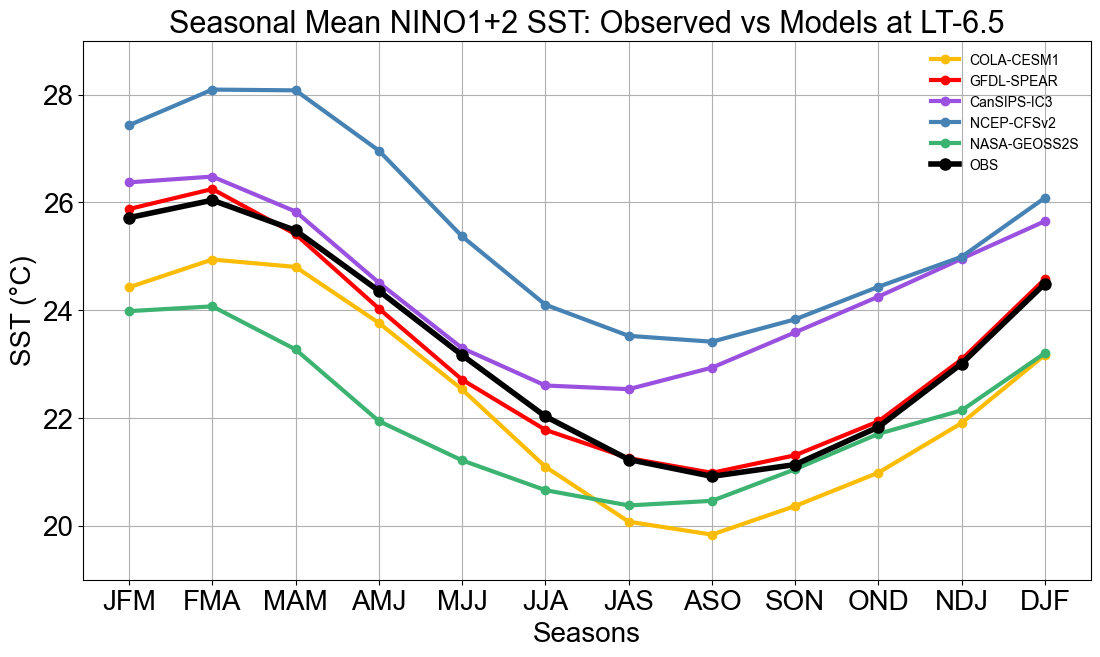

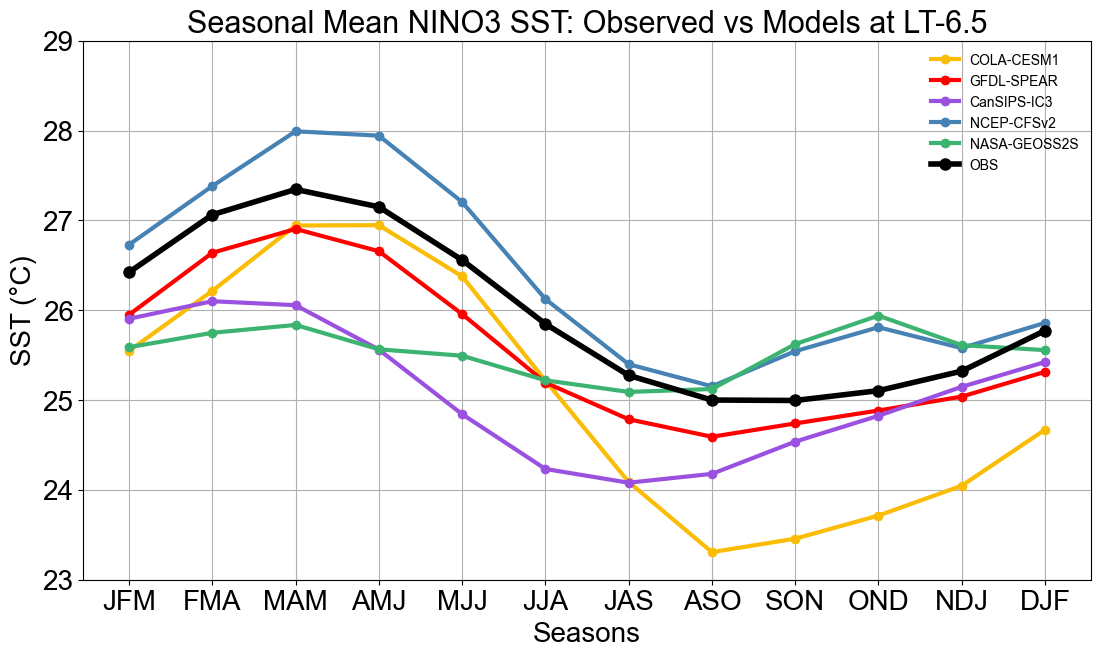

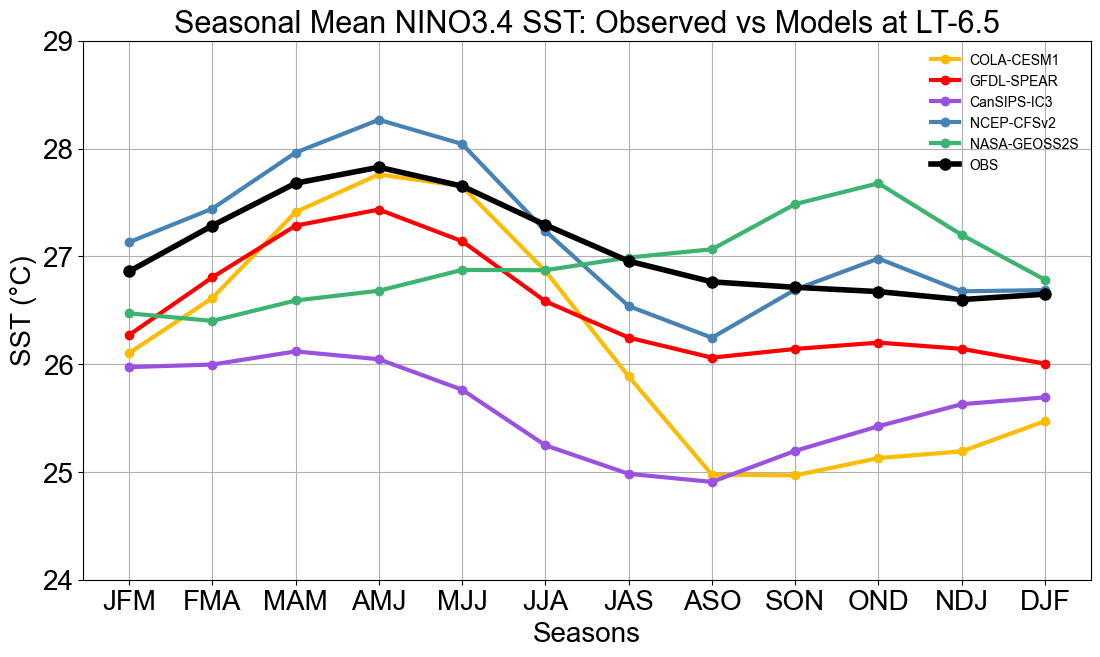

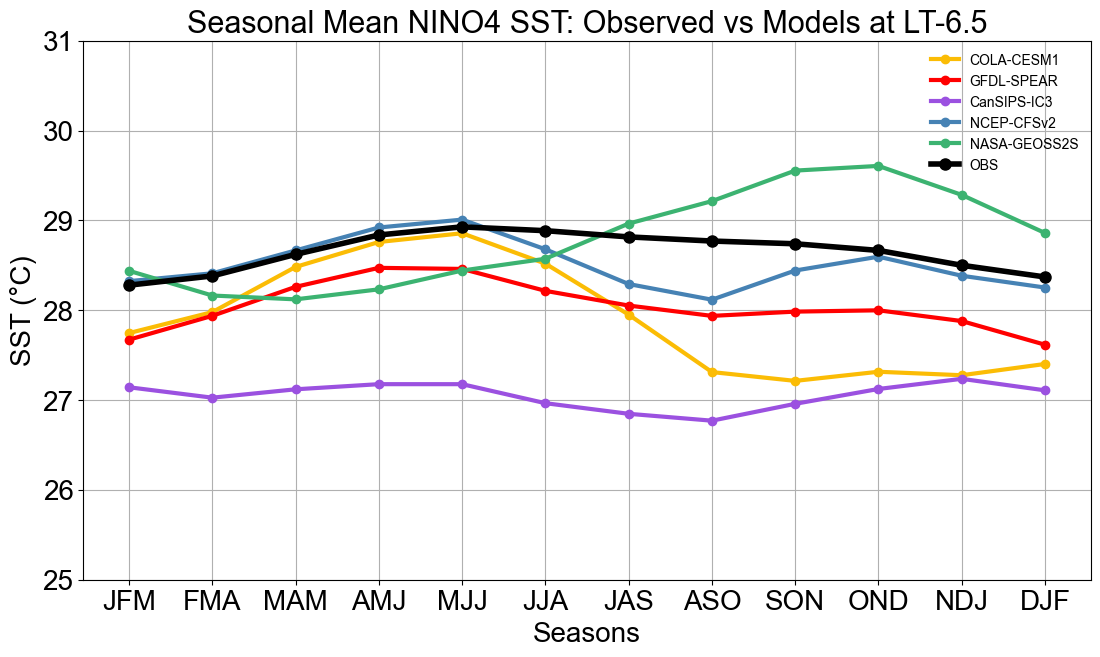

In [38]:
def multimodel_nino3_4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=19, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=23, ymax=29)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'NINO{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=25, ymax=31)
    plt.savefig(f'../Plots/Mean/seasonal_mean_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_functions = {
    '1+2': multimodel_nino1_2_visualizer,
    '3': multimodel_nino3_visualizer,
    '3.4': multimodel_nino3_4_visualizer,
    '4': multimodel_nino4_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_visualizer(region, lead):
    if region in visualizer_functions:
        visualizer_function = visualizer_functions[region]
        visualizer_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_functions.keys())}.")


regions = ['1+2', '3', '3.4', '4']
leads =  [1,2,3,4,5,6,7]

for lead in leads:
    for region in regions:
       run_visualizer(region, lead)

#make a presentation.. for each lead time -> put the four regions in one 
#1+2 3
#3.4 4 -> arragnement of 2x2. by lead time. 
    

In [35]:
obs

MON  NINO1+2_L3   NINO3_L3  NINO3.4_L3   NINO4_L3  SZN  VARIANCE1+2_L3  \
0     2   25.717667  26.422444   26.859889  28.279111  JFM        0.633224   
1     3   26.041222  27.063111   27.284667  28.381778  FMA        0.687875   
2     4   25.479778  27.345222   27.678333  28.621556  MAM        0.969434   
3     5   24.358667  27.150444   27.826222  28.837556  AMJ        1.243217   
4     6   23.166333  26.558444   27.651111  28.928111  MJJ        1.278459   
5     7   22.029889  25.847444   27.291667  28.885333  JJA        1.215305   
6     8   21.230444  25.274778   26.955667  28.816111  JAS        1.155230   
7     9   20.918111  25.000333   26.763333  28.770111  ASO        1.097573   
8    10   21.135889  24.995222   26.712556  28.739667  SON        1.217331   
9    11   21.832889  25.104667   26.672667  28.665667  OND        1.309250   
10   12   23.010222  25.322111   26.598889  28.500333  NDJ        1.201736   
11    1   24.495222  25.772667   26.648667  28.370222  DJF        0.822973   

    VARIANCE3_L3  VARIANCE3.4_L3  VARIANCE4_L3  
0       0.722083        0.911147      0.602424  
1       0.438982        0.569984      0.483076  
2       0.314258        0.338432      0.351696  
3       0.300520        0.256750      0.272307  
4       0.356976        0.281245      0.238351  
5       0.489432        0.401165      0.252990  
6       0.671820        0.576438      0.303363  
7       0.879021        0.797956      0.397474  
8       1.143673        1.057599      0.521443  
9       1.366630        1.304206      0.646976  
10      1.389889        1.402310      0.710849  
11      1.095406        1.230987      0.681446

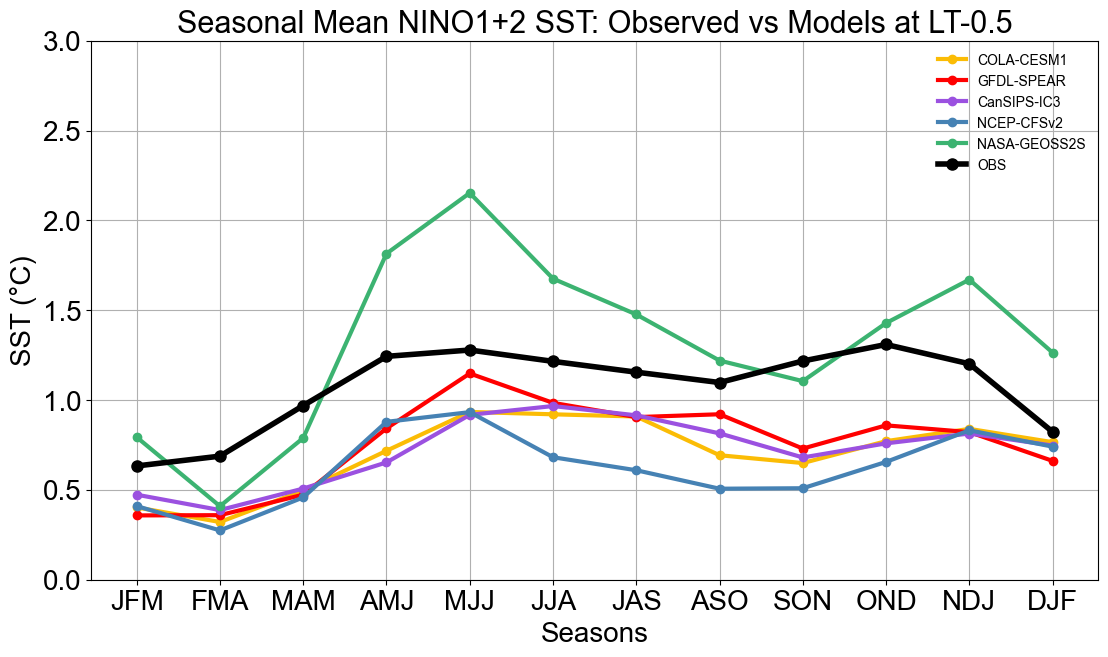

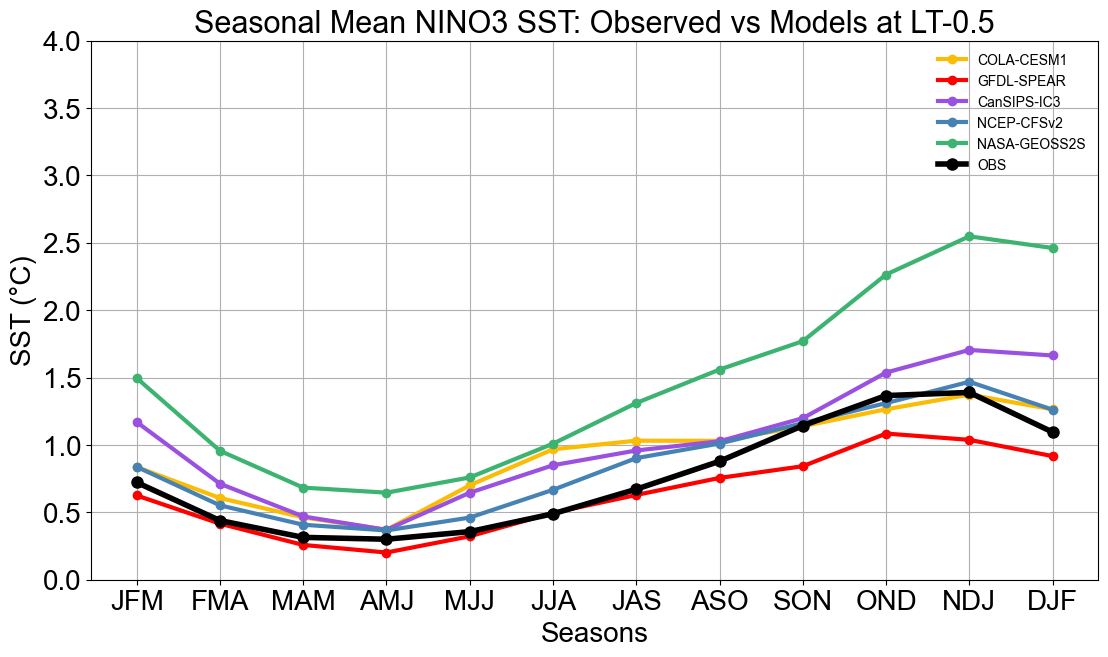

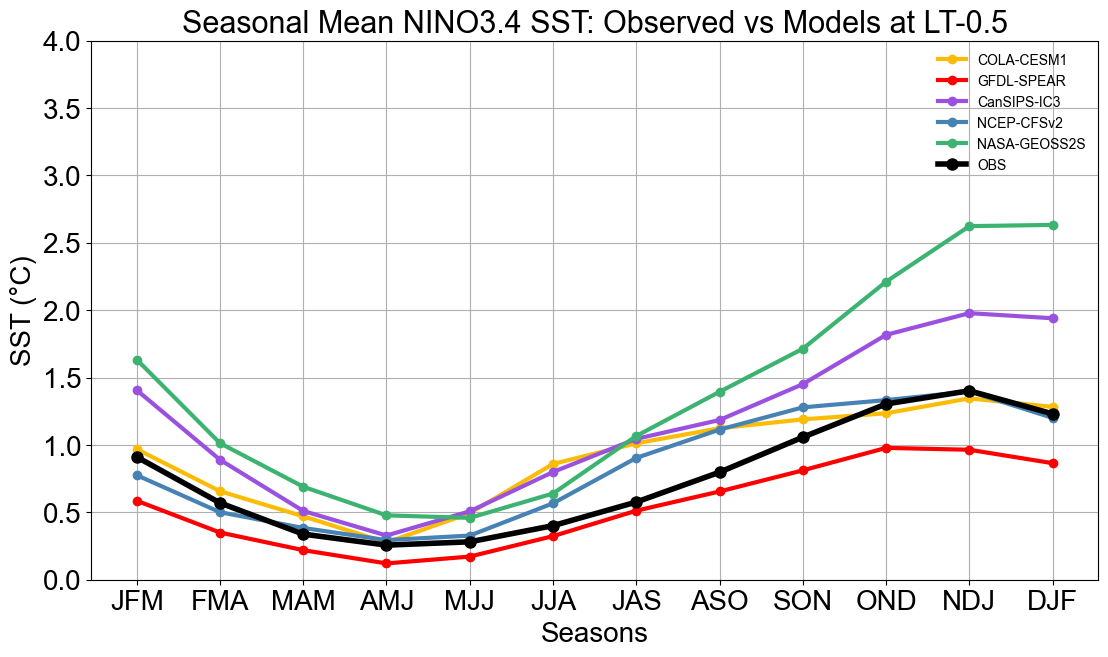

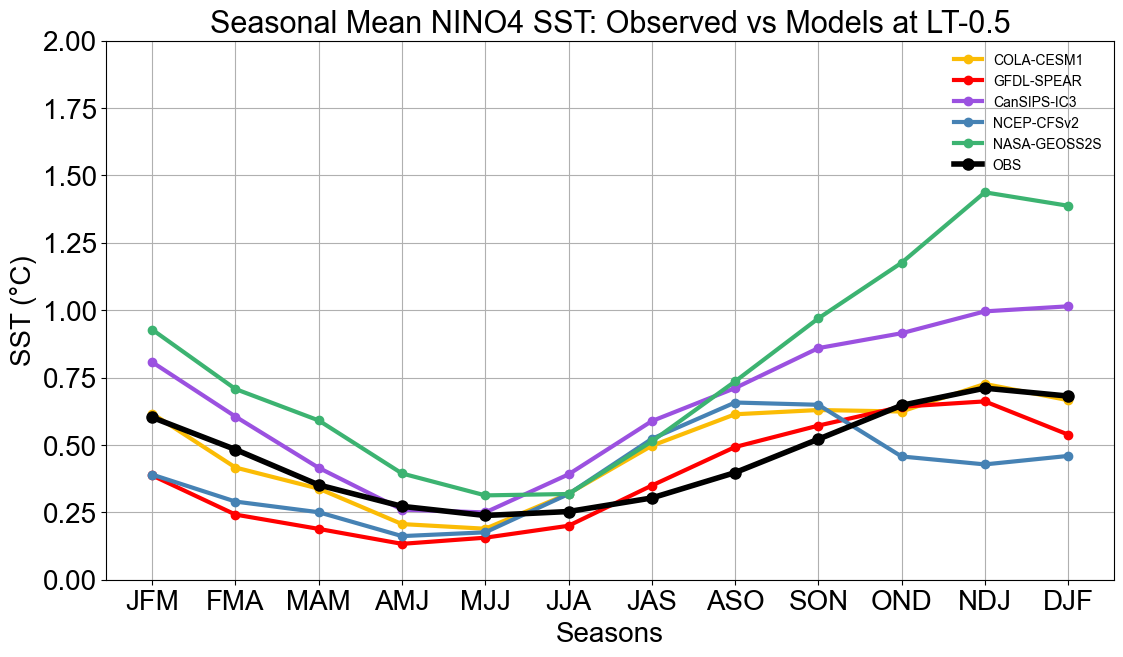

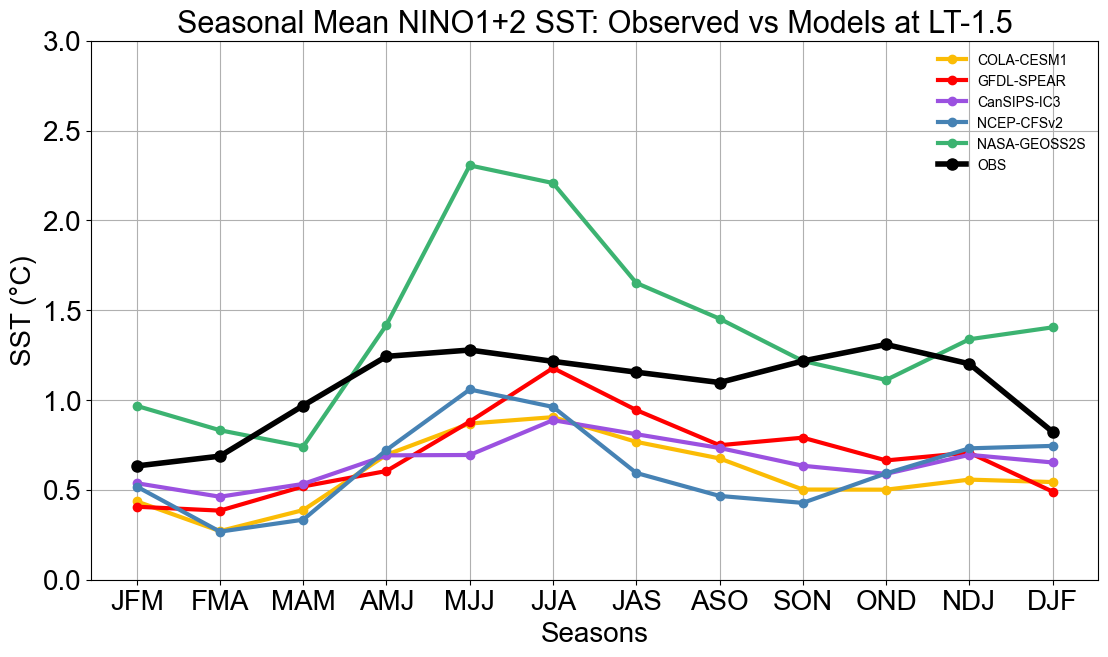

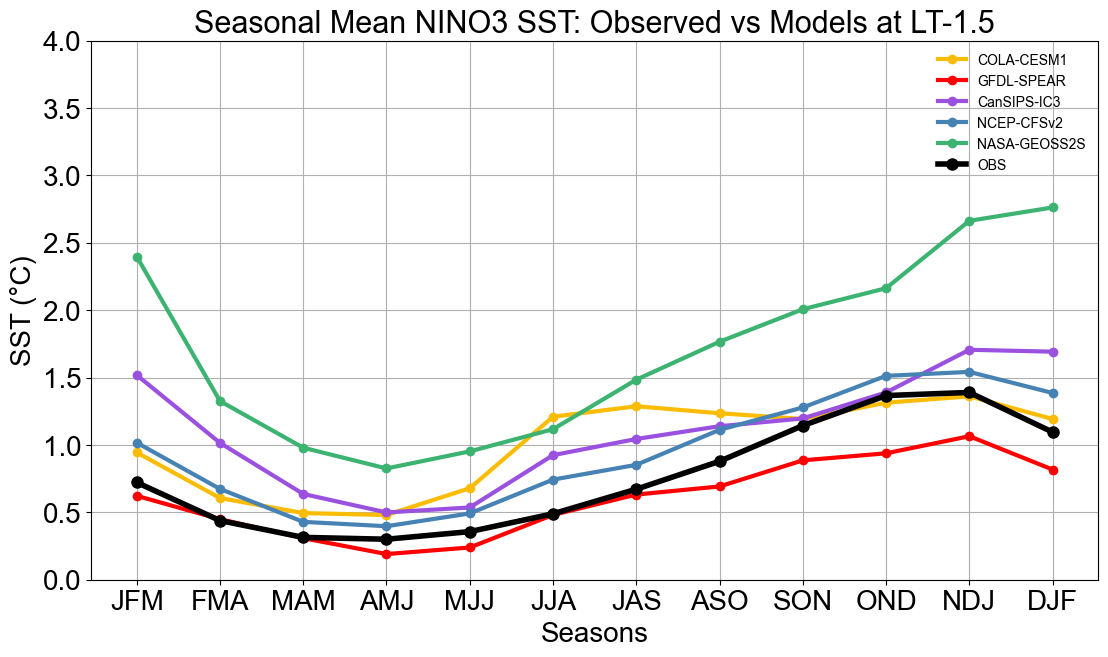

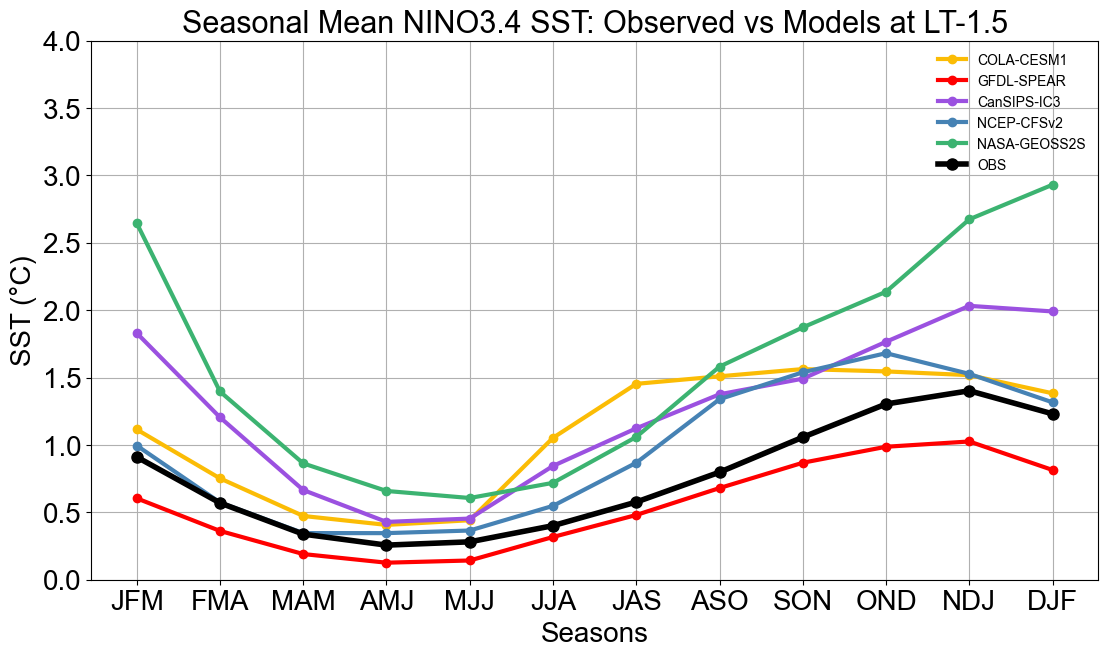

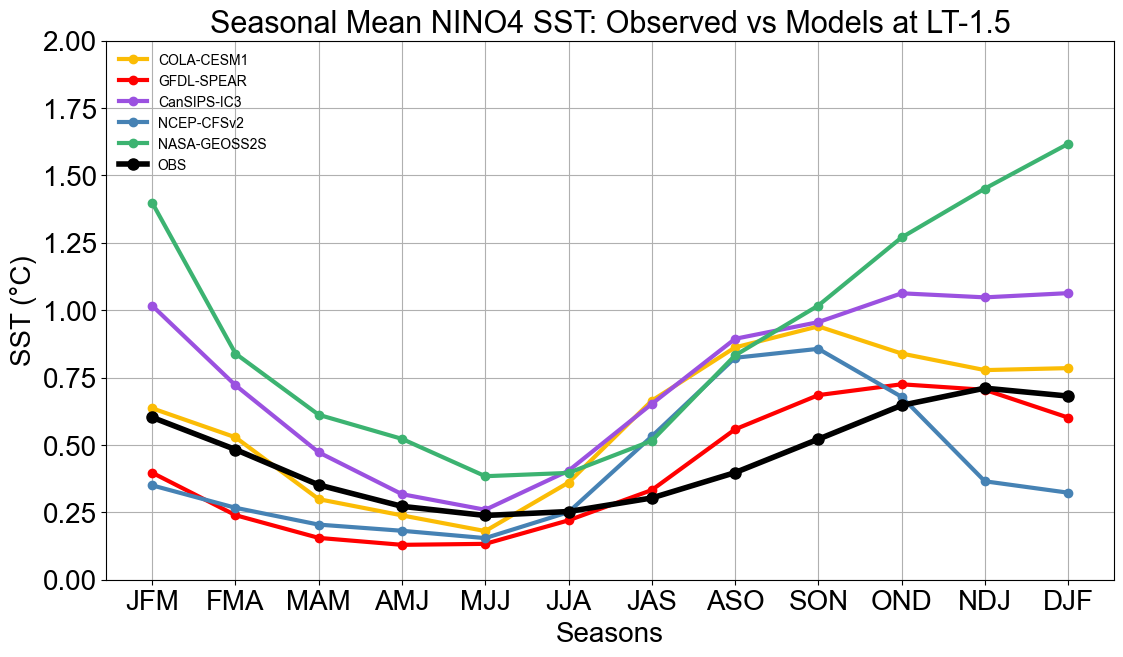

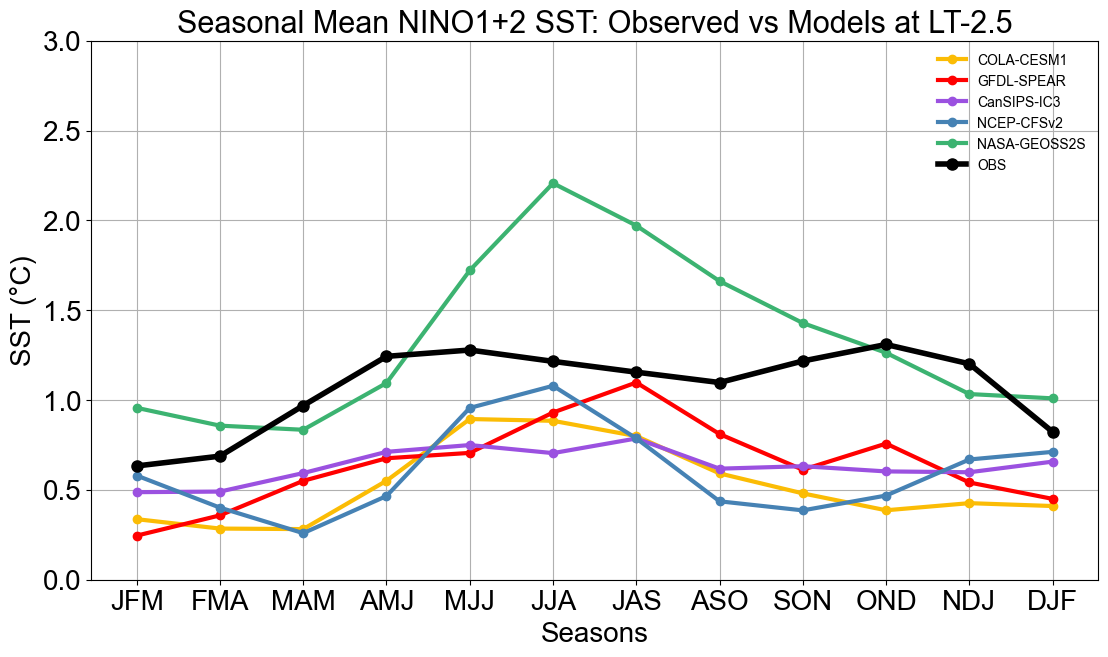

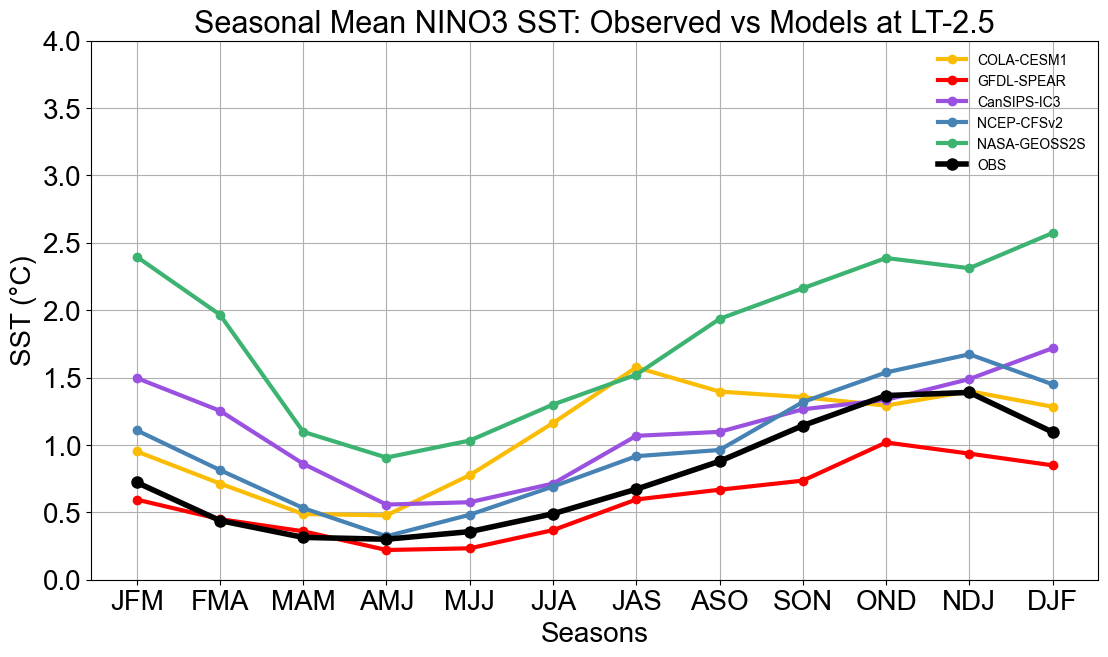

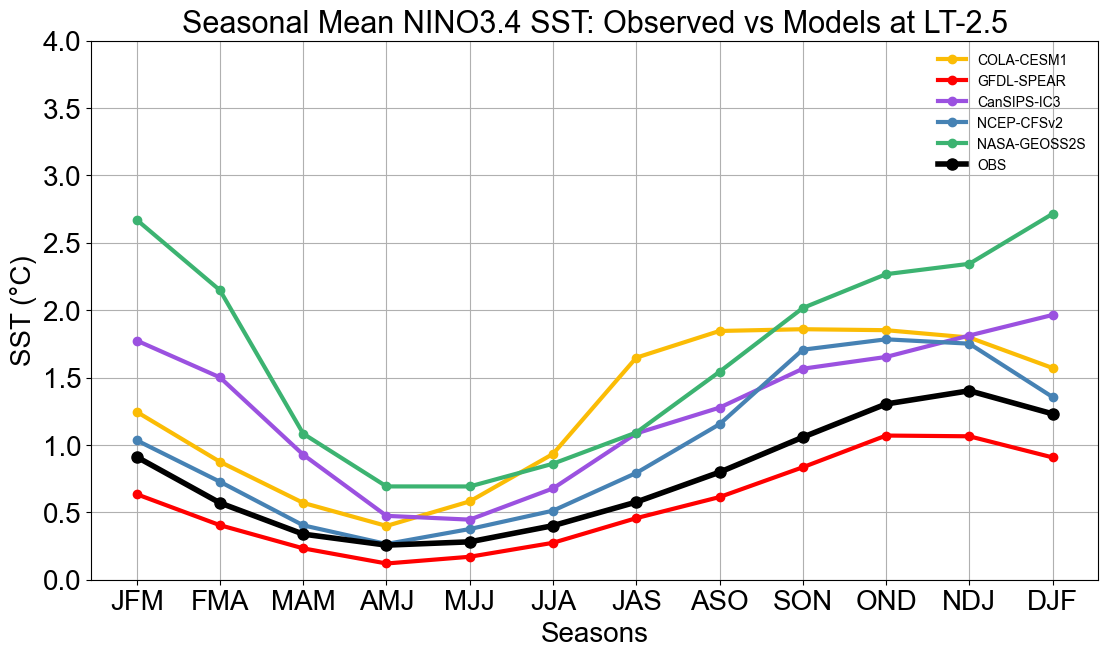

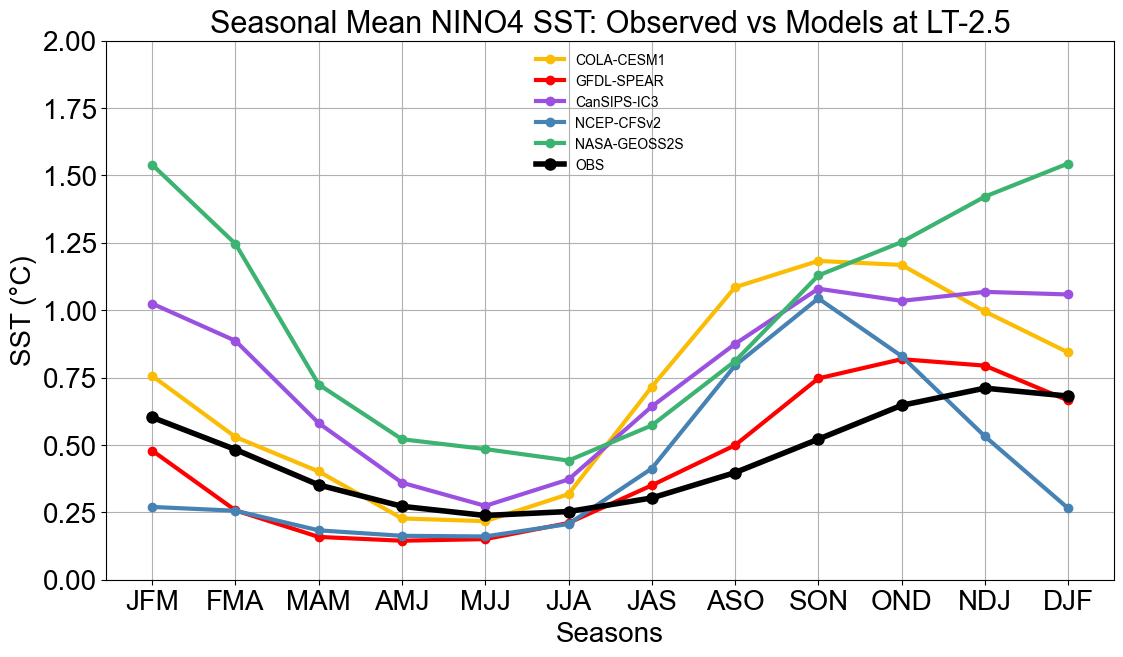

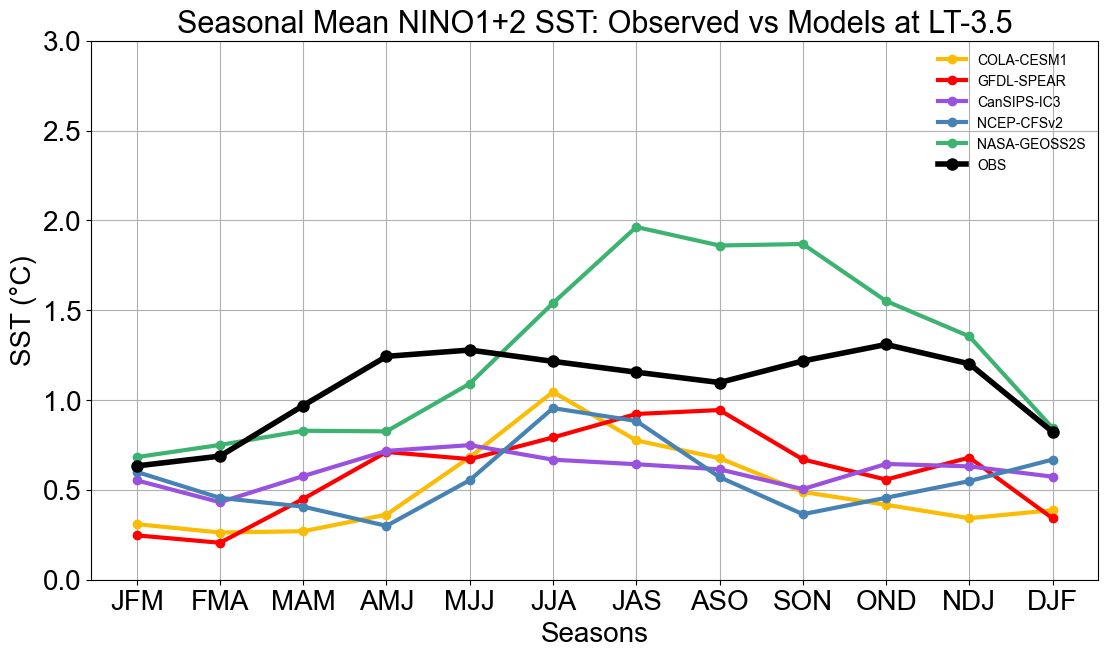

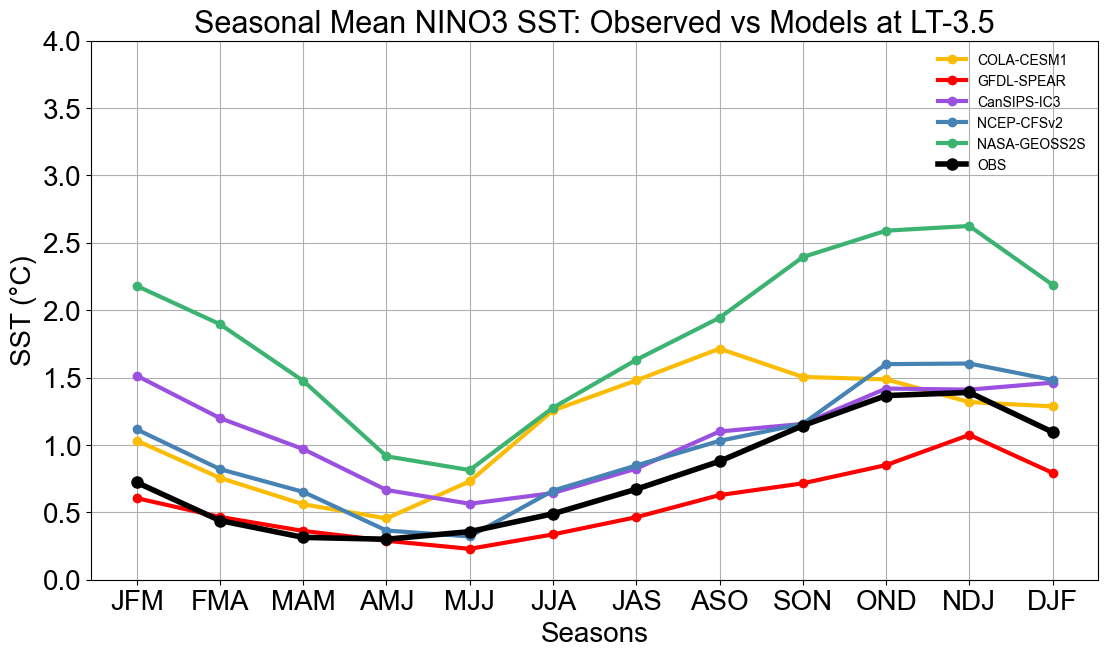

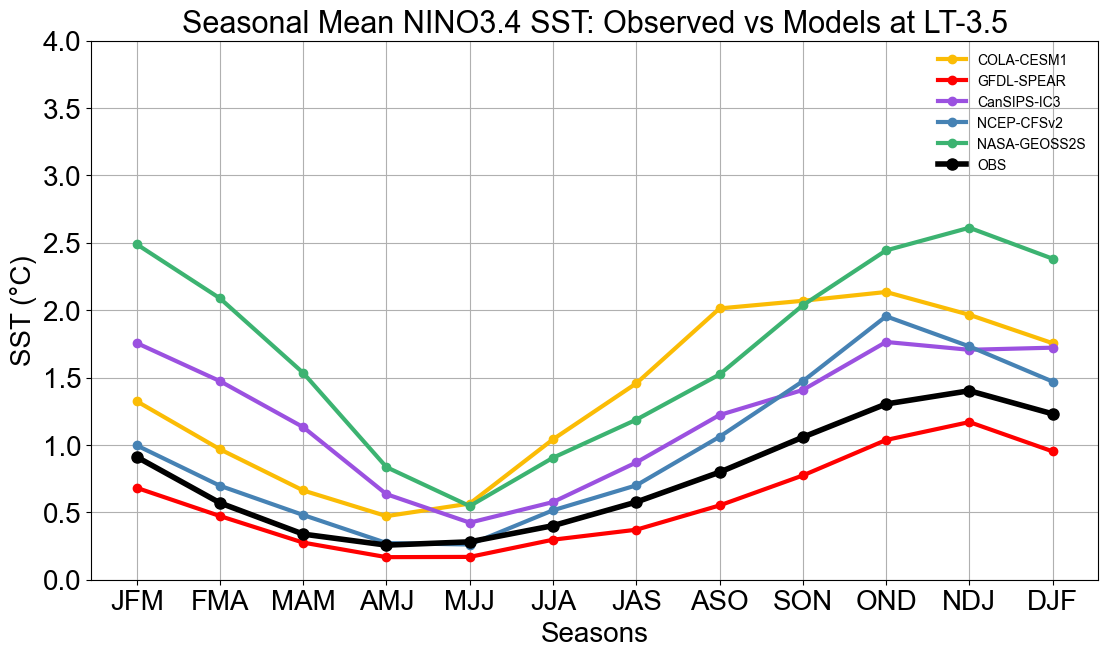

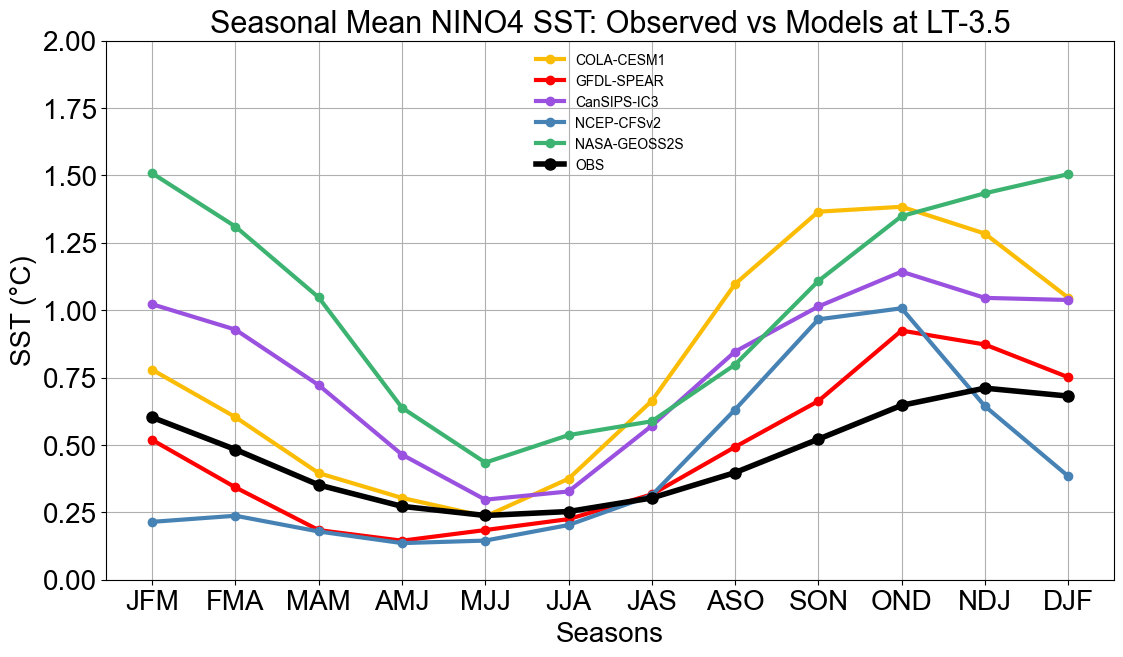

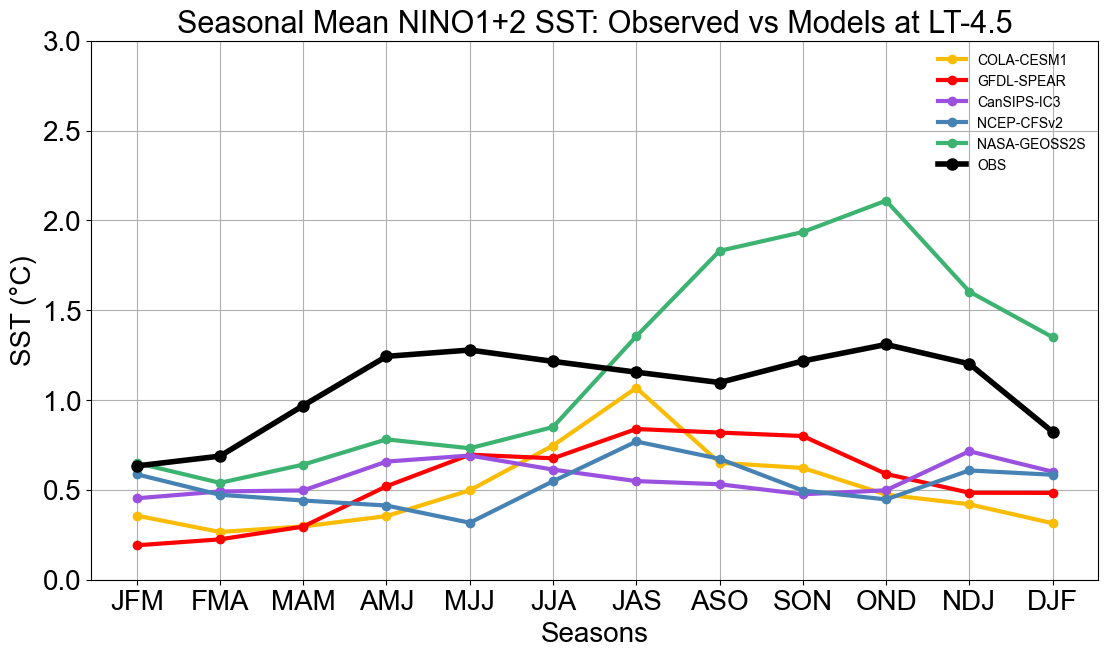

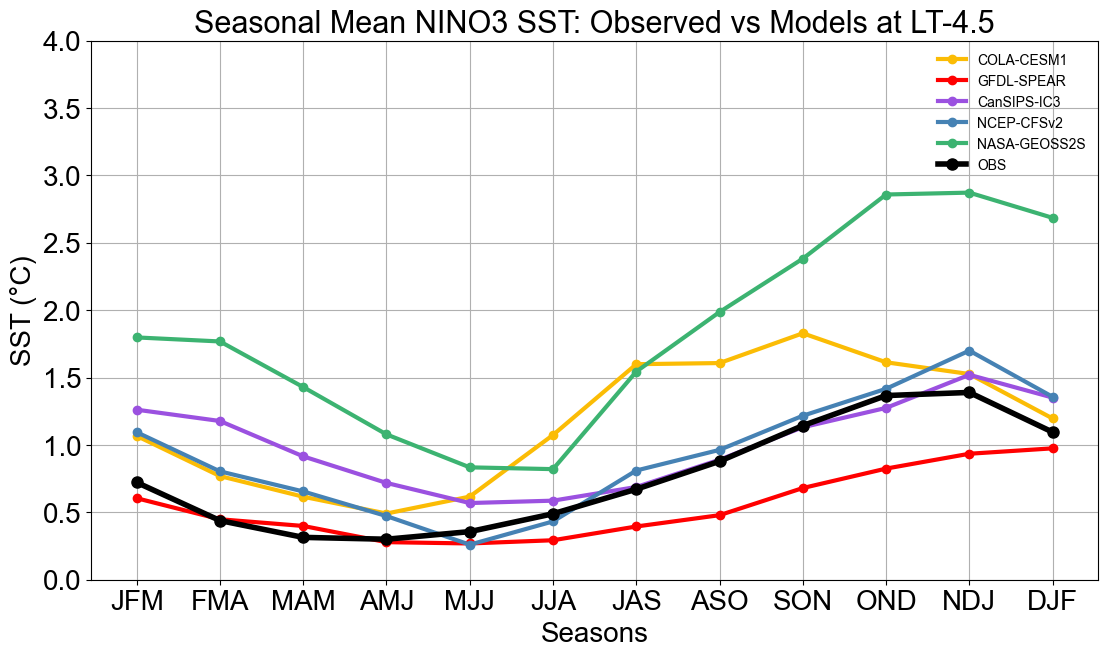

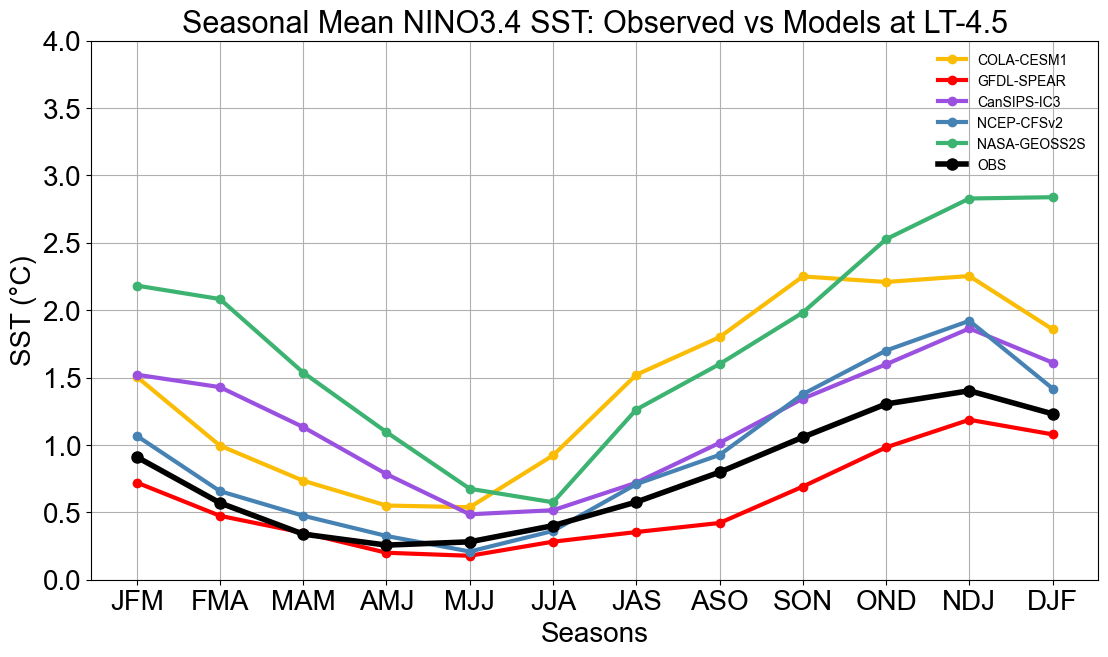

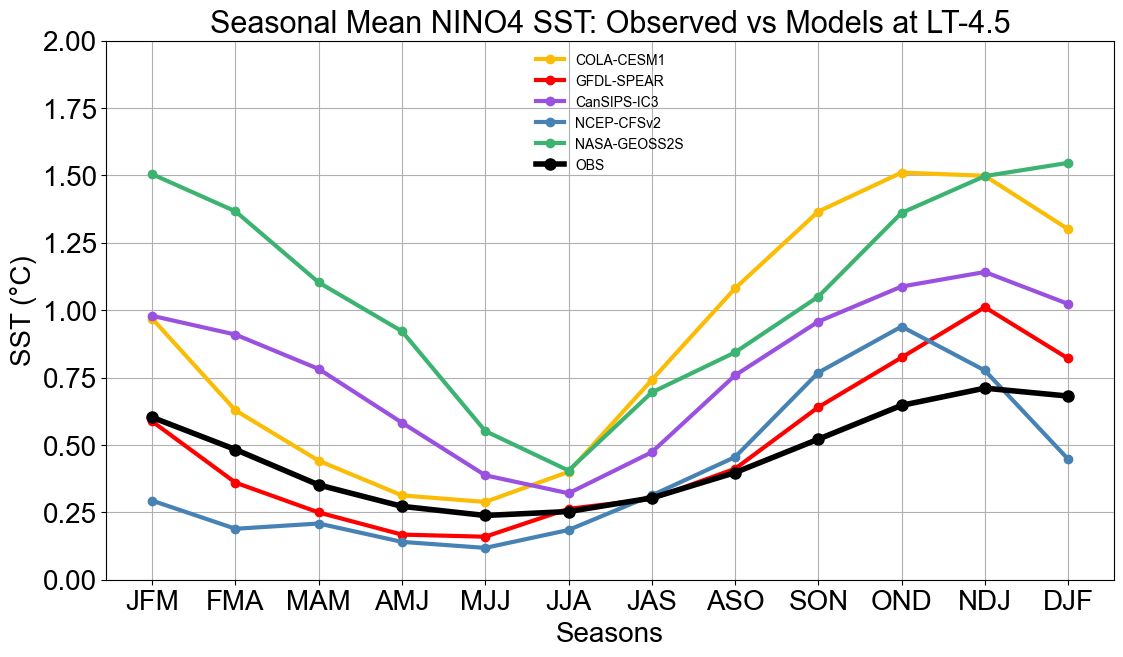

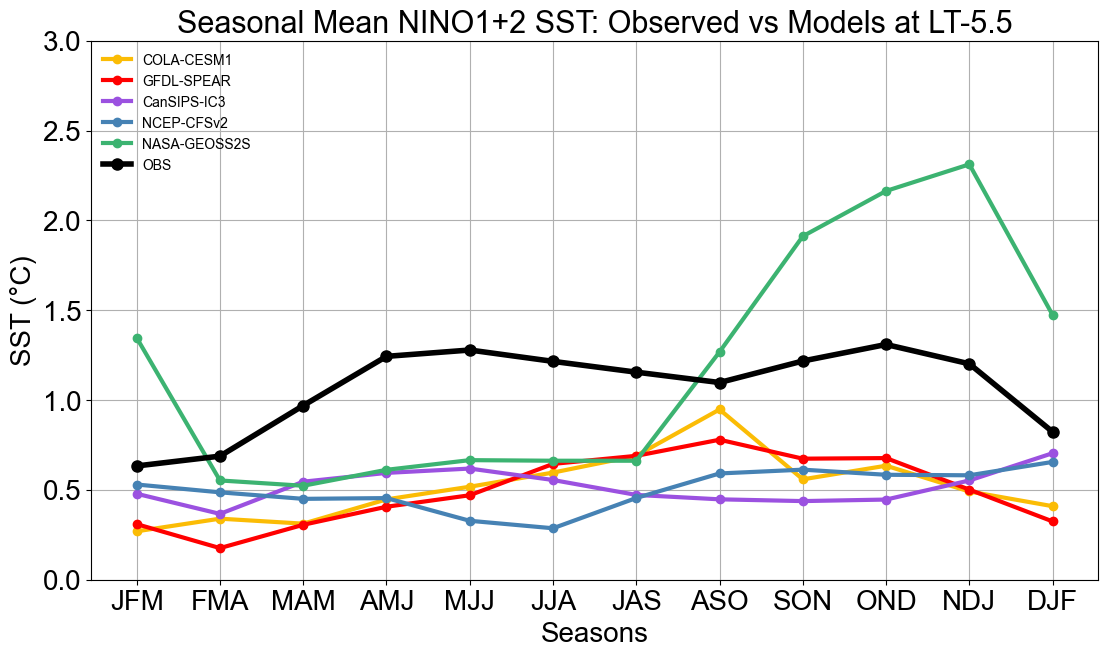

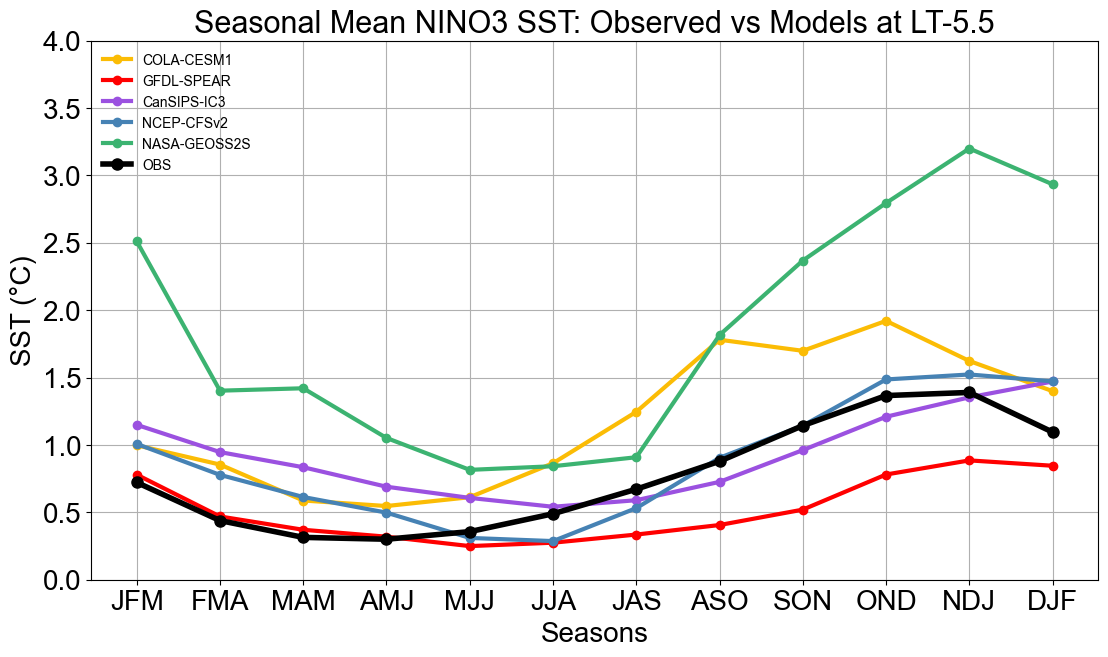

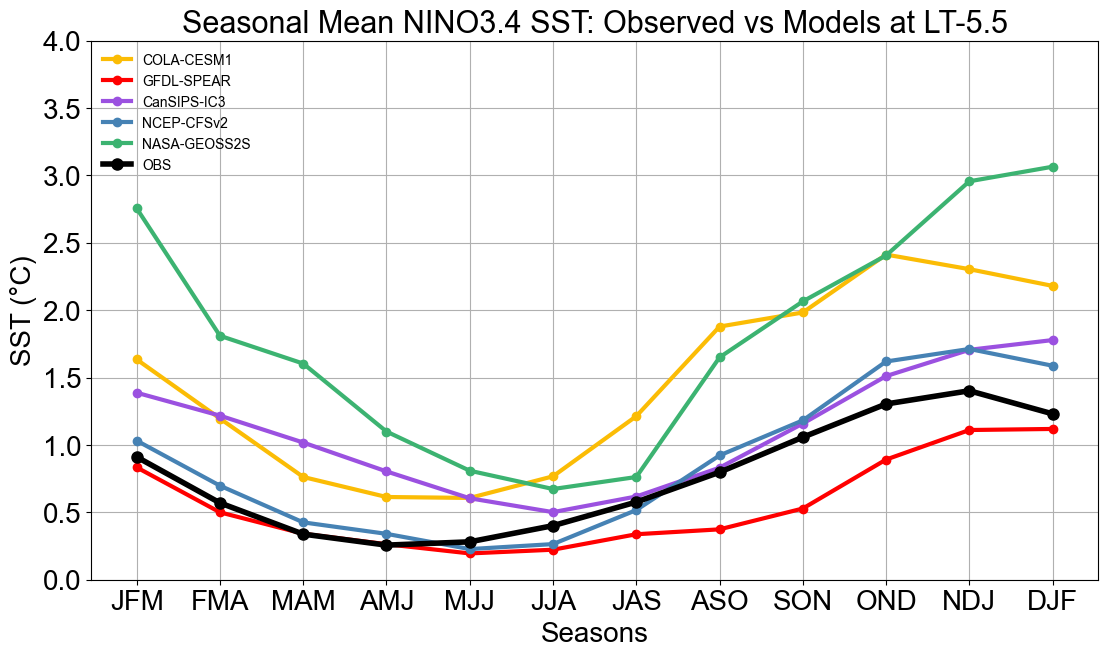

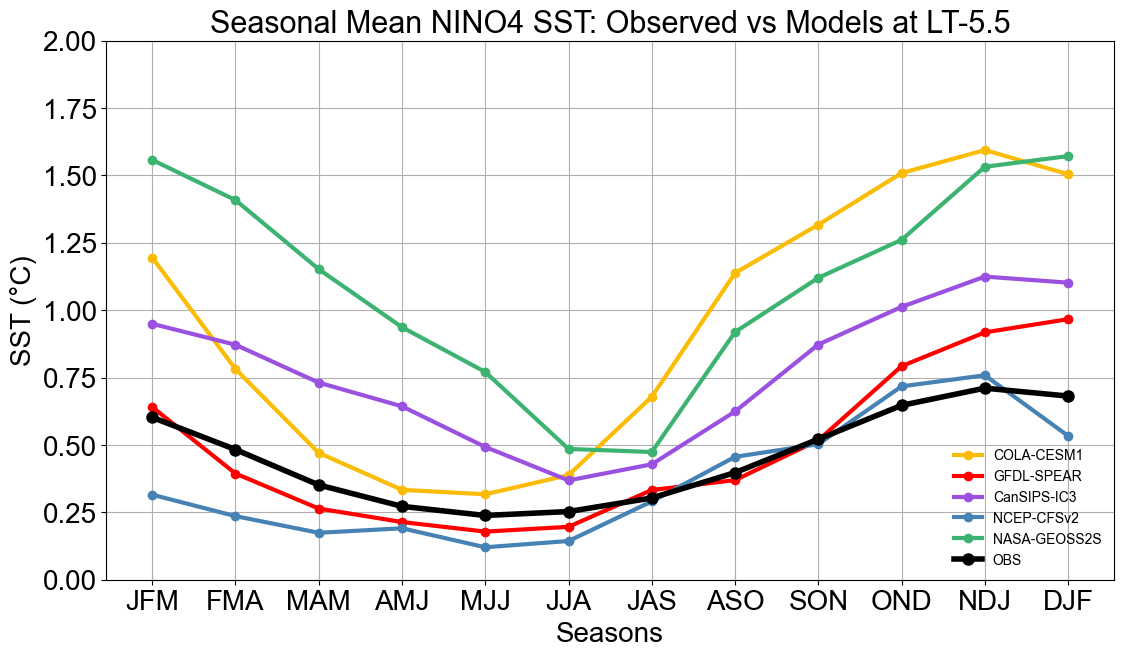

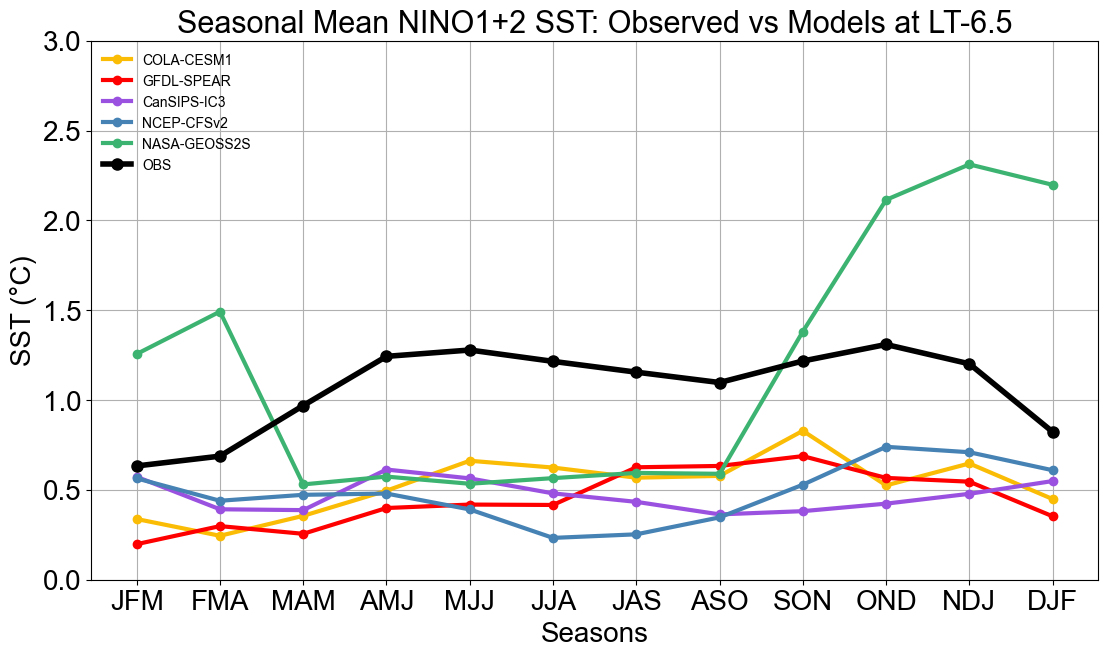

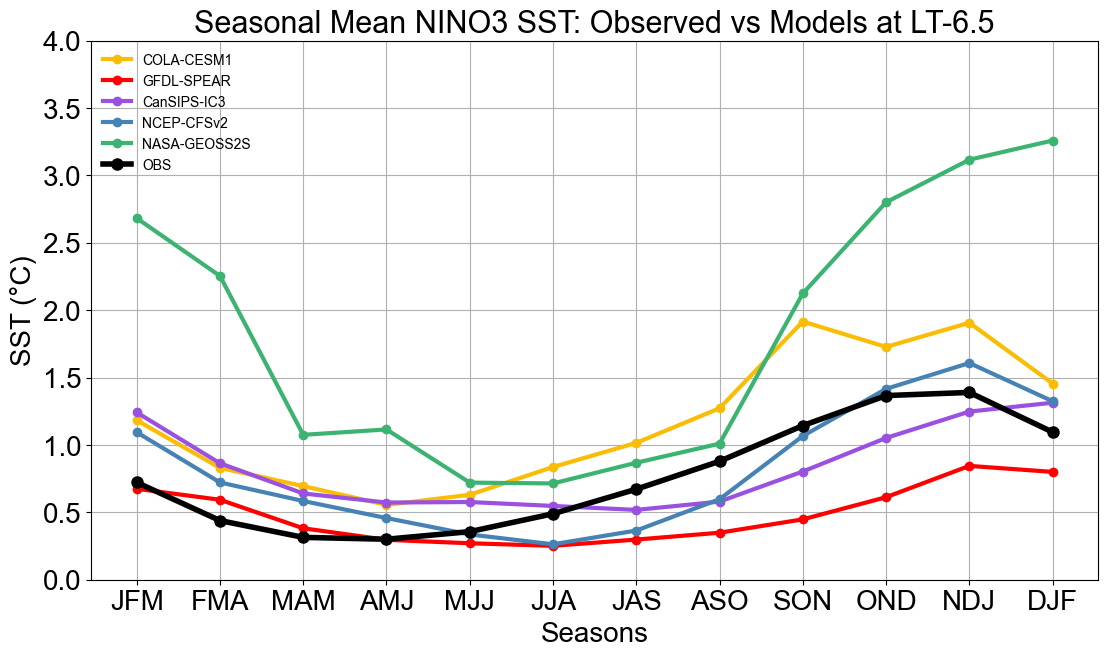

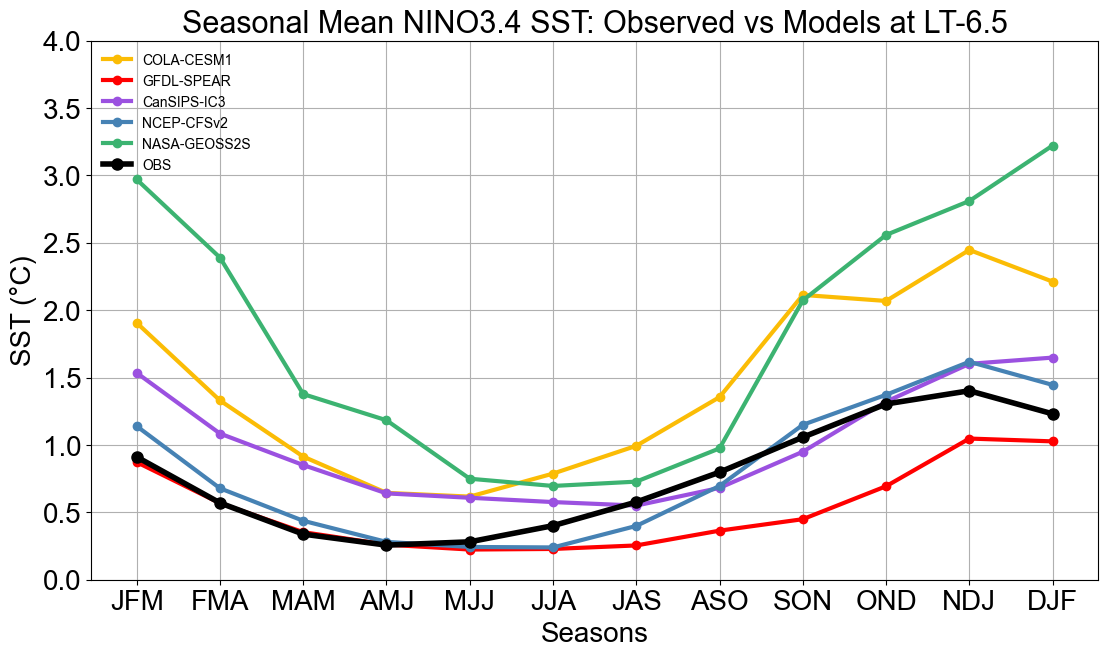

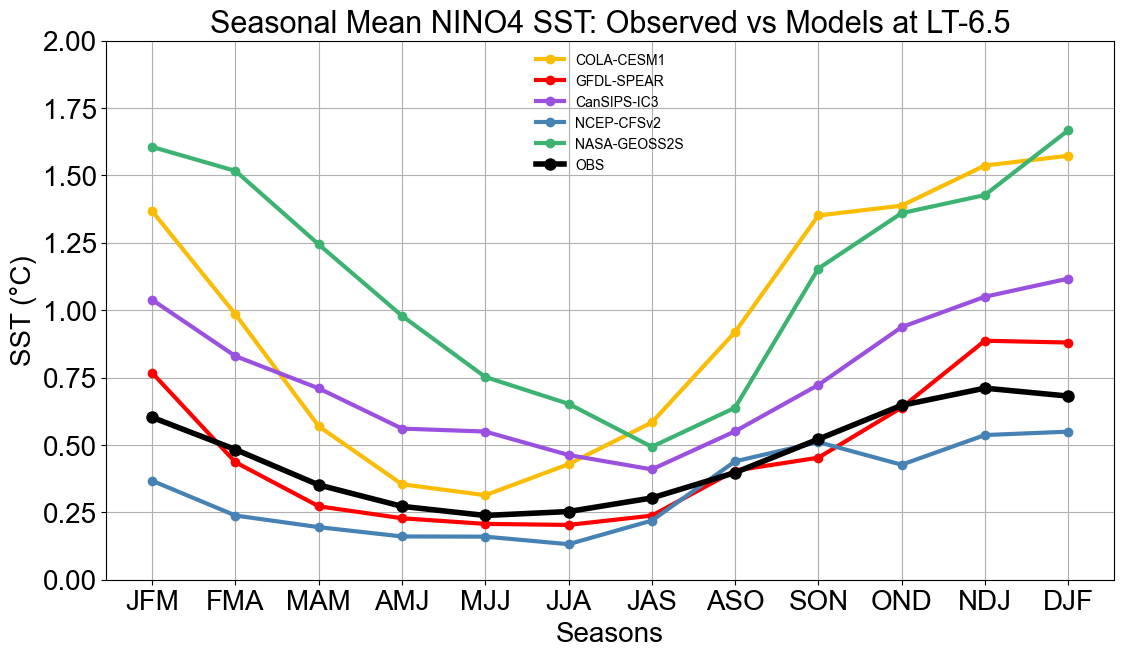

In [36]:
def multimodel_nino3_4_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=4)
    #plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
    
def multimodel_nino1_2_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2_ONETWO'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S_ONETWO'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3)
    #plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino3_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2_THREE'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S_THREE'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=4)
    #plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

def multimodel_nino4_var_visualizer(region, lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2_FOUR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S_FOUR'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(obs['SZN'], obs[f'VARIANCE{region}_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    #Customize the plot
    plt.title(f'Seasonal Mean NINO{region} SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=2)
    #plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()


visualizer_var_functions = {
    '1+2': multimodel_nino1_2_var_visualizer,
    '3': multimodel_nino3_var_visualizer,
    '3.4': multimodel_nino3_4_var_visualizer,
    '4': multimodel_nino4_var_visualizer
}

# Higher-level function to call the appropriate visualizer function
def run_var_visualizer(region, lead):
    if region in visualizer_var_functions:
        visualizer_var_function = visualizer_var_functions[region]
        visualizer_var_function(region, lead)
    else:
        print(f"Error: Region {region} is not recognized. Valid regions are {list(visualizer_var_functions.keys())}.")


regions = ['1+2', '3', '3.4', '4']
leads =  [1,2,3,4,5,6,7]

for lead in leads:
    for region in regions:
       run_var_visualizer(region, lead)

#make a presentation.. for each lead time -> put the four regions in one 
#1+2 3
#3.4 4 -> arragnement of 2x2. by lead time. 
    